# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [3]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [6]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

En cuanto a 2020:

In [11]:
data_2020.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

Como se puede observar, se agrega la columna "observación", que tiene algunos detalles adicionales.

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [12]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
data = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data.estacion=='Illia', data.forma_pago == 'EFECTIVO')
dataset = data[mask]


#Voy a armar un dataset con la forma de pago telepase para evaluar migración en la forma de pago.
mask2=np.logical_and(data.estacion=='Illia',data.forma_pago=='TELEPASE')
dataset_telepase=data[mask2]


#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
dataset_telepase.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

print(dataset.head())
print(dataset_telepase.head())                          

          fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769
         fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
20  2019-01-01         1  Martes     Centro       Liviano              59
21  2019-01-01         1  Martes     Centro        Pesado               1
23  2019-01-01         1  Martes  Provincia       Liviano             106
25  2019-01-01         1  Martes  Provincia        Pesado               2
85  2019-01-01         2  Martes     Centro       Liviano             507


C:\Users\arrua\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
dataset_telepase['fecha2'] = pd.to_datetime(dataset_telepase.fecha) + pd.to_timedelta(dataset_telepase.hora_fin, unit = 'h')

dataset.head()

<ipython-input-13-84d91edae889>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
<ipython-input-13-84d91edae889>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_telepase['fecha2'] = pd.to_datetime(dataset_telepase.fecha) + pd.to_timedelta(dataset_telepase.hora_fin, unit = 'h')


fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos  \
80   2019-01-01         2  Martes     Centro       Liviano             537   
86   2019-01-01         2  Martes     Centro        Pesado               1   
88   2019-01-01         2  Martes  Provincia       Liviano             443   
94   2019-01-01         2  Martes  Provincia        Pesado               1   
149  2019-01-01         3  Martes     Centro       Liviano             769   

                 fecha2  
80  2019-01-01 02:00:00  
86  2019-01-01 02:00:00  
88  2019-01-01 02:00:00  
94  2019-01-01 02:00:00  
149 2019-01-01 03:00:00

In [14]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

dataset_telepase.sort_values('fecha', inplace = True)
dataset_telepase.reset_index(drop=True, inplace = True)

dataset

<ipython-input-14-1ed8191530b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.sort_values('fecha', inplace = True)
<ipython-input-14-1ed8191530b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_telepase.sort_values('fecha', inplace = True)


fecha  hora_fin      dia    sentido tipo_vehiculo  \
0       2017-01-01         0  Domingo     Centro       Liviano   
1       2017-01-01         2  Domingo  Provincia       Liviano   
2       2017-01-01         2  Domingo  Provincia       Liviano   
3       2017-01-01         0  Domingo     Centro        Pesado   
4       2017-01-01         0  Domingo     Centro        Pesado   
...            ...       ...      ...        ...           ...   
238864  2019-12-31         7   Martes  Provincia        Pesado   
238865  2019-12-31         7   Martes  Provincia       Liviano   
238866  2019-12-31         7   Martes     Centro        Pesado   
238867  2019-12-31         6   Martes  Provincia       Liviano   
238868  2019-12-31         6   Martes  Provincia        Pesado   

        cantidad_pasos              fecha2  
0                  857 2017-01-01 00:00:00  
1                  561 2017-01-01 02:00:00  
2                   12 2017-01-01 02:00:00  
3                    1 2017-01-01 00:00:00  
4                   21 2017-01-01 00:00:00  
...                ...                 ...  
238864               6 2019-12-31 07:00:00  
238865             276 2019-12-31 07:00:00  
238866              16 2019-12-31 07:00:00  
238867             224 2019-12-31 06:00:00  
238868               6 2019-12-31 06:00:00  

[238869 rows x 7 columns]

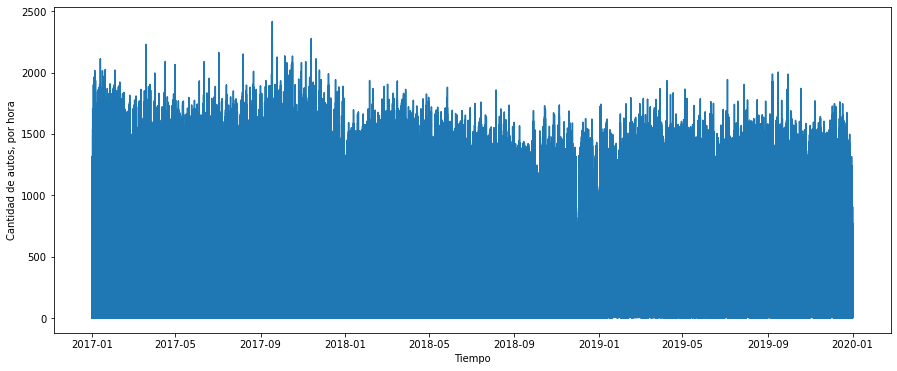

In [15]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha2, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [16]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable

diario = dataset.resample('D', on = 'fecha2').sum()
semanal=dataset.resample('W', on = 'fecha2').sum()
mensual=dataset.resample('M',on='fecha2').sum()

diario_telepase=dataset_telepase.resample('D',on='fecha2').sum()

print(diario.shape)
print(diario.head())
print(mensual.head())

(1095, 2)
            hora_fin  cantidad_pasos
fecha2                              
2017-01-01      2976           31183
2017-01-02      3713           51568
2017-01-03      3573           51093
2017-01-04      3909           53332
2017-01-05      3820           56486
            hora_fin  cantidad_pasos
fecha2                              
2017-01-31    115552         1565260
2017-02-28    102467         1363113
2017-03-31    110300         1451214
2017-04-30    101517         1373985
2017-05-31    106585         1407136


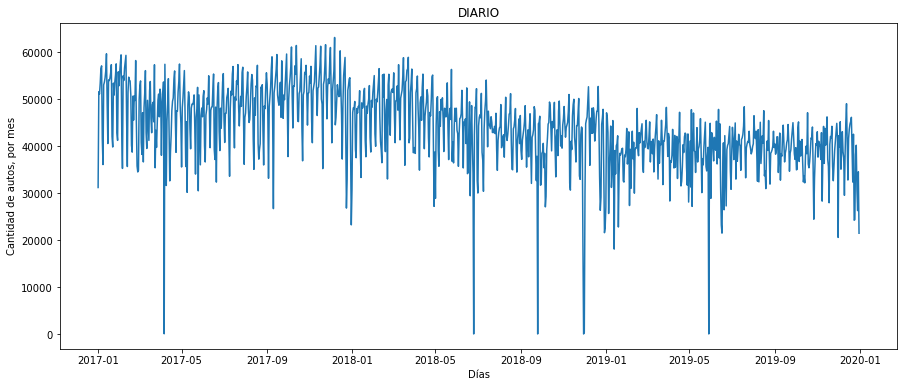

In [17]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Días')
plt.ylabel('Cantidad de autos, por mes')
plt.title('DIARIO')
plt.show()

In [18]:
diario.loc[diario.cantidad_pasos==0]

hora_fin  cantidad_pasos
fecha2                              
2018-06-25         0               0
2018-09-25         0               0
2018-11-30         0               0
2019-05-29         0               0

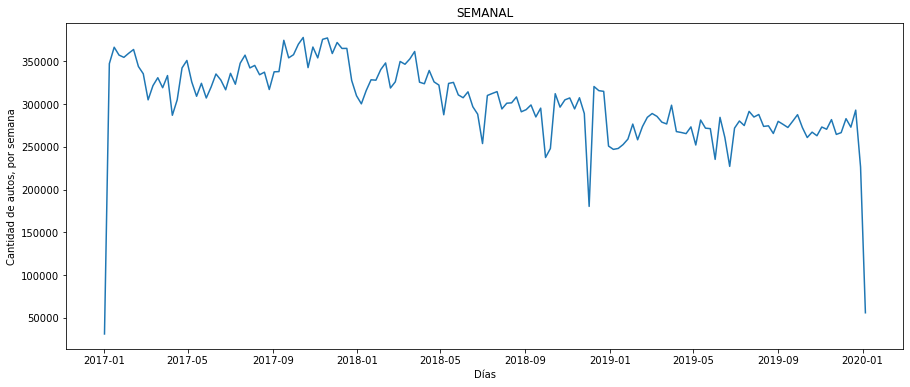

In [19]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Días')
plt.ylabel('Cantidad de autos, por semana')
plt.title('SEMANAL')
plt.show()

Tenemos algunos valores nulos. Los voy a reemplazar luego por NaN

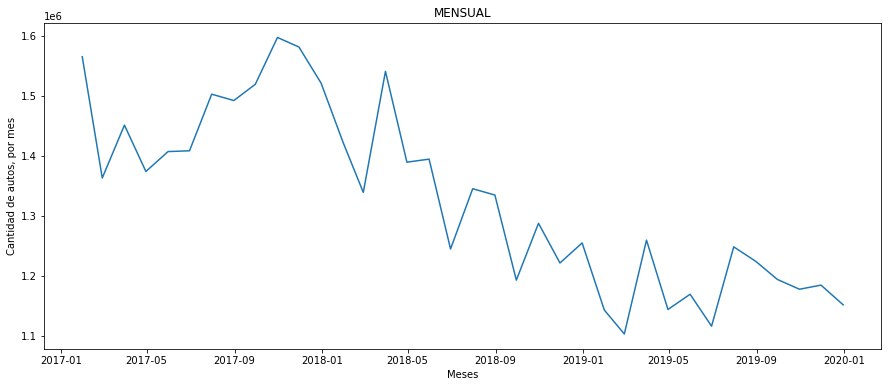

In [20]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.title('MENSUAL')
plt.xlabel('Meses')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

In [21]:
diario['check']=diario.index.to_series().diff()
diario.head()

hora_fin  cantidad_pasos  check
fecha2                                     
2017-01-01      2976           31183    NaT
2017-01-02      3713           51568 1 days
2017-01-03      3573           51093 1 days
2017-01-04      3909           53332 1 days
2017-01-05      3820           56486 1 days

In [22]:
diario.check.value_counts()

1 days    1094
Name: check, dtype: int64

En el punto anterior pude verificar que no tengo fechas nulas.

In [23]:
dataset.head()

fecha  hora_fin      dia    sentido tipo_vehiculo  cantidad_pasos  \
0  2017-01-01         0  Domingo     Centro       Liviano             857   
1  2017-01-01         2  Domingo  Provincia       Liviano             561   
2  2017-01-01         2  Domingo  Provincia       Liviano              12   
3  2017-01-01         0  Domingo     Centro        Pesado               1   
4  2017-01-01         0  Domingo     Centro        Pesado              21   

               fecha2  
0 2017-01-01 00:00:00  
1 2017-01-01 02:00:00  
2 2017-01-01 02:00:00  
3 2017-01-01 00:00:00  
4 2017-01-01 00:00:00

¿Qué día y horario es el más transitado de la semana?, ¿Cuál es el menos transitado?

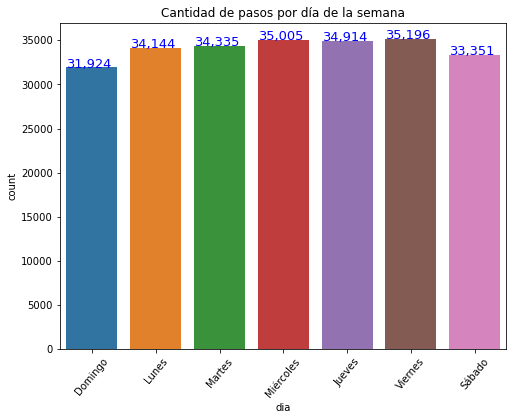

In [24]:
import seaborn as sns

plt.figure(figsize=(8,6))
ax=sns.countplot(data=dataset.cantidad_pasos,x=dataset.dia)
plt.title('Cantidad de pasos por día de la semana')
plt.xticks(rotation=50)


for p in ax.patches:
    valores='{:,.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width/2-0.4
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=13,color='b')
    
plt.show()

Como se puede observar en el gráfico anterior, los días de menor tráfico son los domingos y los sábados. Los miércoles y viernes es cuando más tráfico hay.

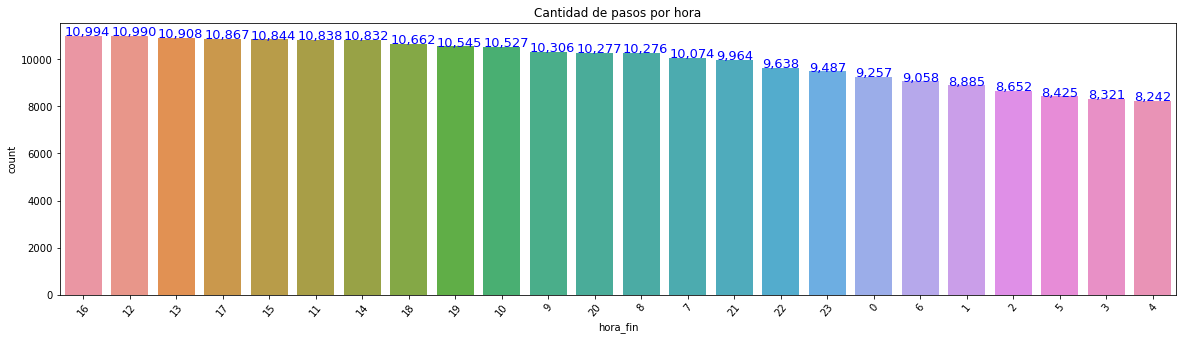

In [25]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data=dataset.cantidad_pasos,x=dataset.hora_fin.astype(str),order=dataset.hora_fin.astype(str).value_counts().sort_values(ascending=False).index)
plt.title('Cantidad de pasos por hora')
plt.xticks(rotation=50)

for p in ax.patches:
    valores='{:,.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width/2-0.4
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=13,color='b')
    
plt.show()



En el gráfico anterior vemos que entre las 9 y las 18 es cuando ha mayor flujo vehicular. Parcicularmente el pico se da a las 16 y a las 12.

¿Qué trimestre del año es el que más flujo vehicular presenta?

In [26]:
dataset['trimestre']=dataset.fecha2.dt.quarter

<ipython-input-26-b149012c058b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['trimestre']=dataset.fecha2.dt.quarter


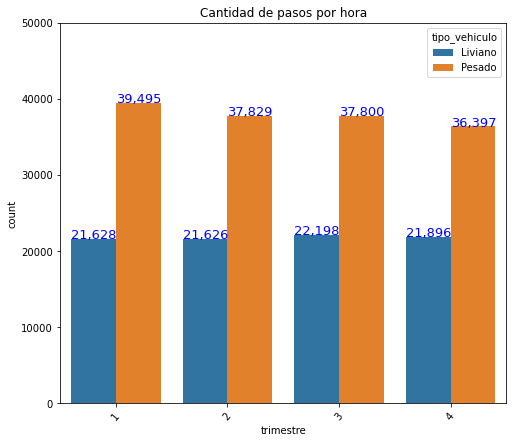

In [27]:
plt.figure(figsize=(8,7))
ax=sns.countplot(data=dataset.cantidad_pasos,x=dataset.trimestre.astype(str),hue=dataset.tipo_vehiculo)
plt.title('Cantidad de pasos por hora')
ax.set_ylim([0,50000])
plt.xticks(rotation=50)

for p in ax.patches:
    valores='{:,.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width/2-0.2
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=13,color='b')
    
plt.show()

Como se observa en el gráfico anterior, el trimestre 4 es donde mas flujo vehicular existe.

In [28]:
dataset.head()

fecha  hora_fin      dia    sentido tipo_vehiculo  cantidad_pasos  \
0  2017-01-01         0  Domingo     Centro       Liviano             857   
1  2017-01-01         2  Domingo  Provincia       Liviano             561   
2  2017-01-01         2  Domingo  Provincia       Liviano              12   
3  2017-01-01         0  Domingo     Centro        Pesado               1   
4  2017-01-01         0  Domingo     Centro        Pesado              21   

               fecha2  trimestre  
0 2017-01-01 00:00:00          1  
1 2017-01-01 02:00:00          1  
2 2017-01-01 02:00:00          1  
3 2017-01-01 00:00:00          1  
4 2017-01-01 00:00:00          1

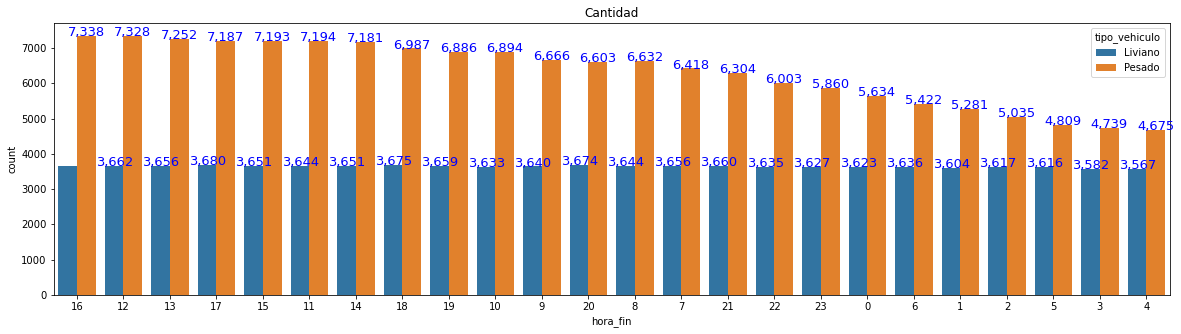

In [29]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data=dataset.cantidad_pasos, x=dataset.hora_fin.astype(str),hue=dataset.tipo_vehiculo,
                order=dataset.hora_fin.astype(str).value_counts().sort_values(ascending=False).index)
plt.title("Cantidad")

for p in ax.patches:
    valores='{:,.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width/2-0.4
    y=p.get_y()+height
    ax.annotate(valores,(x,y),fontsize=13,color='b')
plt.show()

En el gráfico anterior vemos que el mayor flujo vehicular esta dado por el tránsito pesado

### Verificación de outliers

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogr

<AxesSubplot:xlabel='cantidad_pasos', ylabel='Density'>

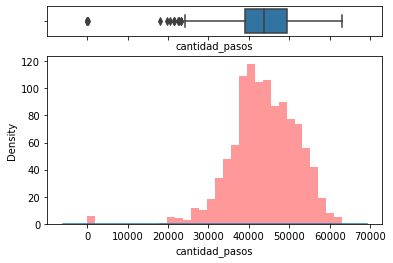

In [30]:
#Se divide el gráfico en dos partes

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(diario.cantidad_pasos, ax=ax_box)
sns.distplot(diario.cantidad_pasos, ax=ax_hist, kde=True, hist=False)
sns.distplot(diario.cantidad_pasos, ax=ax_hist, kde=False, hist=True,norm_hist=False,color='r')

Tanto en el gráfico de cantidad de autos por día, como en el histograma y en el boxplot comprobamos la presencia de valores extraños. Claramente podemos observar que la variable cantidad_pasos no tiene una distribución normal. Voy a definir una ventana móvil para poder filtrar de manera dinámica los valores extraños. Para ello estableceré un límite inferior y superior calculando la media y el desvío estándar.

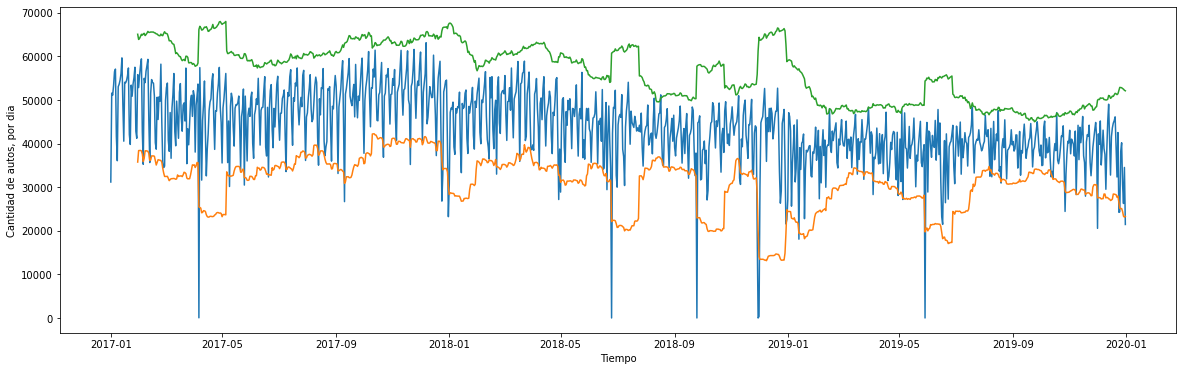

In [31]:
#Defino una ventana de 30 días

wind =30
sigma = 2

diario["inferior"] = diario.cantidad_pasos.rolling(window=wind)\
    .mean() - (sigma * diario.cantidad_pasos.rolling(window=wind).std())
diario["superior"] = diario.cantidad_pasos.rolling(window=wind)\
    .mean() + (sigma * diario.cantidad_pasos.rolling(window=wind).std())

diario['anom']=diario.apply(lambda x: x['cantidad_pasos'] if (x['cantidad_pasos'] <= x['inferior'] or x['cantidad_pasos']>=x['superior'] ) else 0,axis=1)

plt.figure(figsize = (20,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.plot(diario.index, diario.inferior)
plt.plot(diario.index, diario.superior)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

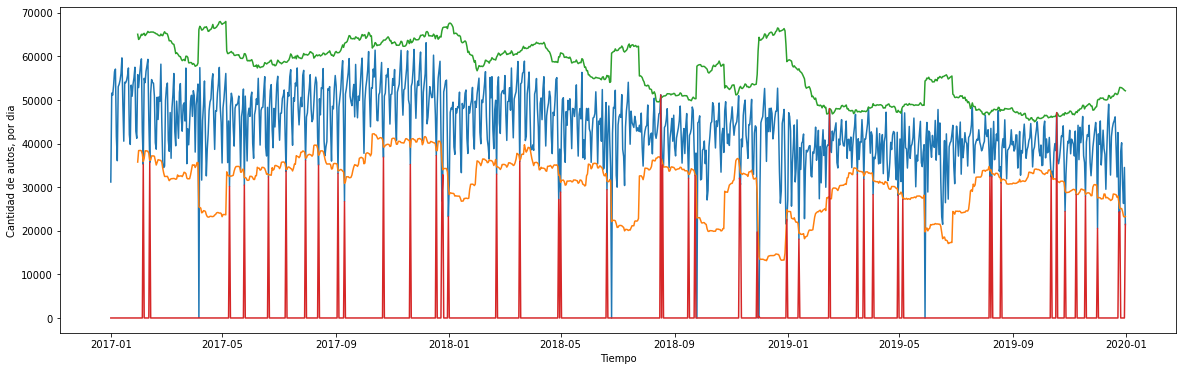

In [32]:
plt.figure(figsize = (20,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.plot(diario.index, diario.inferior)
plt.plot(diario.index, diario.superior)
plt.plot(diario.index, diario.anom)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

En el gráfico anterior podemos ver las "anomalías" encontradas y guardadas en la variable "anom" del dataset.

In [33]:
#Vemos cuales son las anomalías detectadas

diario.loc[diario.anom!=0]

hora_fin  cantidad_pasos  check      inferior      superior   anom
fecha2                                                                        
2017-02-05      3420           35244 1 days  35865.341095  65152.125572  35244
2017-02-12      3448           35647 1 days  36121.809529  65513.590471  35647
2017-04-06         3              40 1 days  25462.268771  66160.597896     40
2017-05-09      2531           30152 1 days  32447.485982  60838.380684  30152
2017-05-25      3371           30479 1 days  32190.126695  60627.006638  30479
2017-06-20      3129           32336 1 days  32795.264709  58598.201958  32336
2017-07-09      3057           33578 1 days  34055.069977  58637.530023  33578
2017-07-30      2968           36125 1 days  36689.861108  60425.005559  36125
2017-08-13      3050           35050 1 days  37322.985632  60257.414368  35050
2017-09-03      3025           33144 1 days  33770.638410  60838.161590  33144
2017-09-10      2663           26684 1 days  30864.438410  62896.694923  26684
2017-10-22      2993           36865 1 days  39201.941250  63724.258750  36865
2017-11-20      3151           35200 1 days  39152.589654  63885.343679  35200
2017-12-18      3123           37240 1 days  38382.481369  64768.251964  37240
2017-12-24      2277           26805 1 days  36016.983969  65827.416031  26805
2017-12-25      2561           32852 1 days  33989.763930  66561.769404  32852
2017-12-31      2277           23229 1 days  30091.664174  67254.469160  23229
2018-02-21      2973           32992 1 days  34623.933448  59847.799885  32992
2018-03-18      3110           35917 1 days  36144.625436  60989.241231  35917
2018-04-29      2907           27169 1 days  32706.571082  59915.562252  27169
2018-05-01      3003           28870 1 days  31116.327429  60793.472571  28870
2018-06-20      3027           29428 1 days  31373.791160  55623.408840  29428
2018-08-17      3521           51169 1 days  36522.378790  50579.687876  51169
2018-08-19      2787           35102 1 days  35471.137203  50721.662797  35102
2018-09-16      3235           32054 1 days  32944.286275  50024.447058  32054
2018-09-23      3063           32654 1 days  32864.023155  50278.243511  32654
2018-11-10      2621           32090 1 days  34777.908901  52794.891099  32090
2018-11-11      2887           30629 1 days  33206.415223  53116.451443  30629
2018-11-29      1870           19728 1 days  28545.211087  55847.455579  19728
2018-12-01        92             350 1 days  14023.611716  64373.188284    350
2018-12-31      2213           22599 1 days  24837.672388  58795.194278  22599
2019-01-13       781           18076 1 days  19428.050444  57157.149556  18076
2019-02-15      1104           48018 1 days  27342.443188  47967.690145  48018
2019-03-17      1104           32975 1 days  33722.189065  47276.277602  32975
2019-03-24      1104           31797 1 days  32583.087697  47421.112303  31797
2019-04-03      1104           28303 1 days  31557.646182  49148.487151  28303
2019-04-30      1099           28086 1 days  28625.970490  47635.696177  28086
2019-05-05      1104           27166 1 days  27446.966043  48493.767290  27166
2019-08-07      1104           32510 1 days  33750.555533  47032.644467  32510
2019-08-09      1100           32379 1 days  33159.449387  47618.083946  32379
2019-08-19      1102           30943 1 days  31230.691020  47780.308980  30943
2019-10-12      1104           32359 1 days  32973.416483  46285.850183  32359
2019-10-18      1104           47105 1 days  31528.708901  46995.024432  47105
2019-10-27      1102           24434 1 days  29138.826117  47107.373883  24434
2019-11-08      1049           28286 1 days  28378.744291  47328.789042  28286
2019-11-18      1104           27937 1 days  28343.912500  48437.754167  27937
2019-12-01       624           20553 1 days  27530.375633  49940.291033  20553
2019-12-24      1034           24220 1 days  26616.516603  52186.016730  24220
2019-12-25      1077           24349 1 days  25136.743869  528

Reemplazamos las anomalías por NaN. Tambien los ceros.

In [34]:
diario.cantidad_pasos=diario.apply(lambda x: x['cantidad_pasos'] if (x['anom']==0) else np.nan,axis=1)
diario.cantidad_pasos=diario.cantidad_pasos.replace(0,np.nan)
diario.loc[diario.anom!=0]

hora_fin  cantidad_pasos  check      inferior      superior   anom
fecha2                                                                        
2017-02-05      3420             NaN 1 days  35865.341095  65152.125572  35244
2017-02-12      3448             NaN 1 days  36121.809529  65513.590471  35647
2017-04-06         3             NaN 1 days  25462.268771  66160.597896     40
2017-05-09      2531             NaN 1 days  32447.485982  60838.380684  30152
2017-05-25      3371             NaN 1 days  32190.126695  60627.006638  30479
2017-06-20      3129             NaN 1 days  32795.264709  58598.201958  32336
2017-07-09      3057             NaN 1 days  34055.069977  58637.530023  33578
2017-07-30      2968             NaN 1 days  36689.861108  60425.005559  36125
2017-08-13      3050             NaN 1 days  37322.985632  60257.414368  35050
2017-09-03      3025             NaN 1 days  33770.638410  60838.161590  33144
2017-09-10      2663             NaN 1 days  30864.438410  62896.694923  26684
2017-10-22      2993             NaN 1 days  39201.941250  63724.258750  36865
2017-11-20      3151             NaN 1 days  39152.589654  63885.343679  35200
2017-12-18      3123             NaN 1 days  38382.481369  64768.251964  37240
2017-12-24      2277             NaN 1 days  36016.983969  65827.416031  26805
2017-12-25      2561             NaN 1 days  33989.763930  66561.769404  32852
2017-12-31      2277             NaN 1 days  30091.664174  67254.469160  23229
2018-02-21      2973             NaN 1 days  34623.933448  59847.799885  32992
2018-03-18      3110             NaN 1 days  36144.625436  60989.241231  35917
2018-04-29      2907             NaN 1 days  32706.571082  59915.562252  27169
2018-05-01      3003             NaN 1 days  31116.327429  60793.472571  28870
2018-06-20      3027             NaN 1 days  31373.791160  55623.408840  29428
2018-08-17      3521             NaN 1 days  36522.378790  50579.687876  51169
2018-08-19      2787             NaN 1 days  35471.137203  50721.662797  35102
2018-09-16      3235             NaN 1 days  32944.286275  50024.447058  32054
2018-09-23      3063             NaN 1 days  32864.023155  50278.243511  32654
2018-11-10      2621             NaN 1 days  34777.908901  52794.891099  32090
2018-11-11      2887             NaN 1 days  33206.415223  53116.451443  30629
2018-11-29      1870             NaN 1 days  28545.211087  55847.455579  19728
2018-12-01        92             NaN 1 days  14023.611716  64373.188284    350
2018-12-31      2213             NaN 1 days  24837.672388  58795.194278  22599
2019-01-13       781             NaN 1 days  19428.050444  57157.149556  18076
2019-02-15      1104             NaN 1 days  27342.443188  47967.690145  48018
2019-03-17      1104             NaN 1 days  33722.189065  47276.277602  32975
2019-03-24      1104             NaN 1 days  32583.087697  47421.112303  31797
2019-04-03      1104             NaN 1 days  31557.646182  49148.487151  28303
2019-04-30      1099             NaN 1 days  28625.970490  47635.696177  28086
2019-05-05      1104             NaN 1 days  27446.966043  48493.767290  27166
2019-08-07      1104             NaN 1 days  33750.555533  47032.644467  32510
2019-08-09      1100             NaN 1 days  33159.449387  47618.083946  32379
2019-08-19      1102             NaN 1 days  31230.691020  47780.308980  30943
2019-10-12      1104             NaN 1 days  32973.416483  46285.850183  32359
2019-10-18      1104             NaN 1 days  31528.708901  46995.024432  47105
2019-10-27      1102             NaN 1 days  29138.826117  47107.373883  24434
2019-11-08      1049             NaN 1 days  28378.744291  47328.789042  28286
2019-11-18      1104             NaN 1 days  28343.912500  48437.754167  27937
2019-12-01       624             NaN 1 days  27530.375633  49940.291033  20553
2019-12-24      1034             NaN 1 days  26616.516603  52186.016730  24220
2019-12-25      1077             NaN 1 days  25136.743869  528

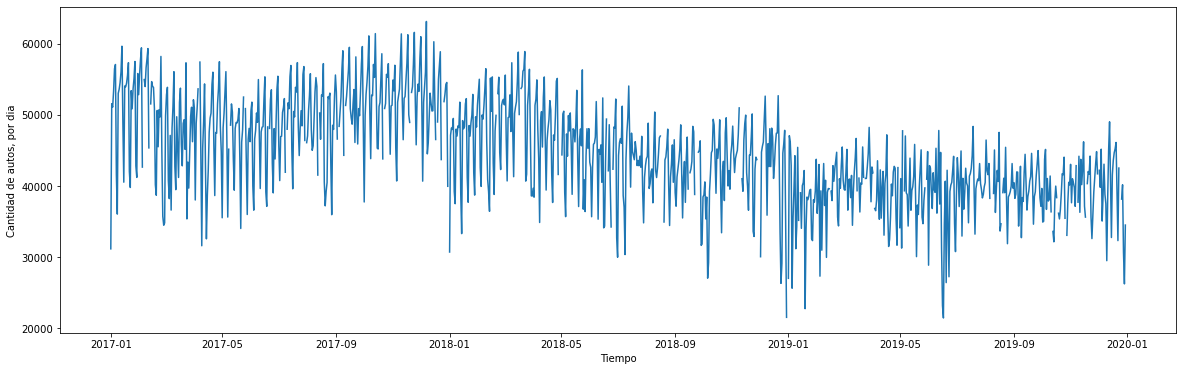

In [35]:
plt.figure(figsize = (20,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Voy a reemplazar los valores nulos introducidos por medio del metodo interpolate

In [36]:
diario.drop(['check','inferior','superior','anom'],axis=1,inplace=True)

print("El dataset de diario tiene los siguientes valores nulos:")
diario.isnull().sum()

El dataset de diario tiene los siguientes valores nulos:


hora_fin           0
cantidad_pasos    54
dtype: int64

In [37]:
diario = diario.interpolate()

print("El dataset de diario tiene los siguientes valores nulos:")
diario.isnull().sum()

El dataset de diario tiene los siguientes valores nulos:


hora_fin          0
cantidad_pasos    0
dtype: int64

## Cálculo de tendencia

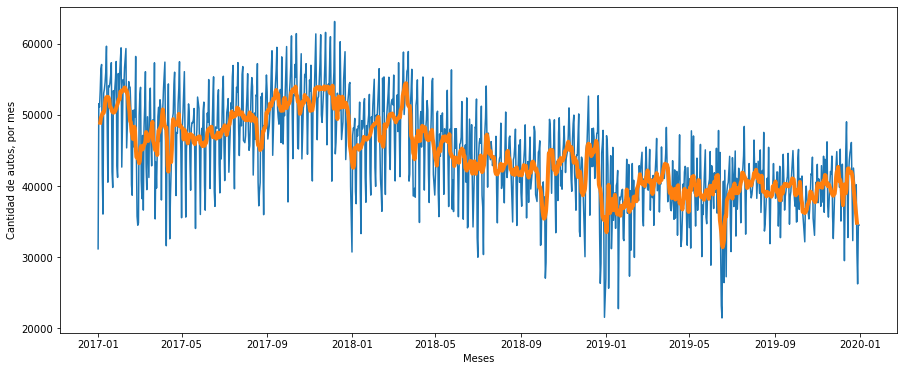

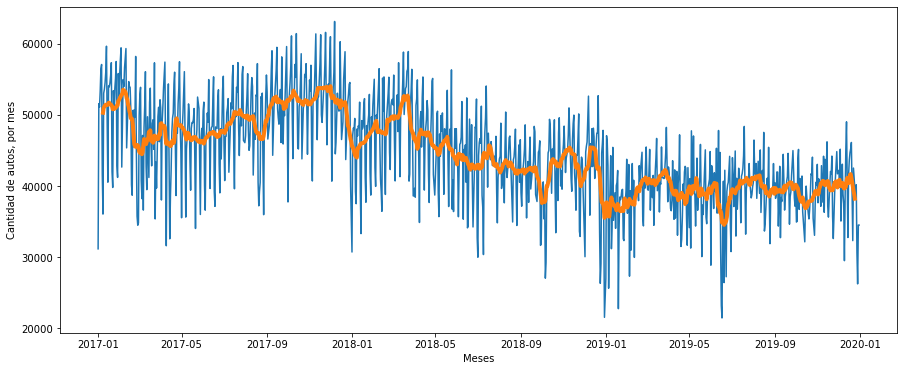

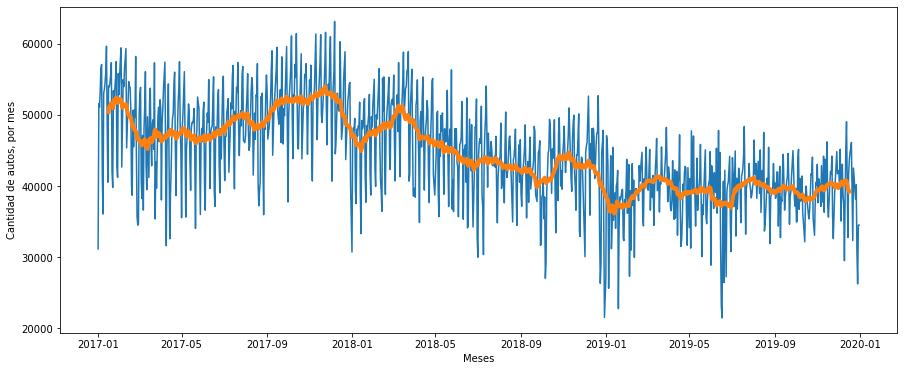

In [38]:
for i in [7,14,30]:
    window = i
    semanal_promedio_tendencia = diario.cantidad_pasos.rolling(window=window, center = True).mean()
    semanal_promedio_tendencia_telepase = diario_telepase.cantidad_pasos.rolling(window=window, center = True).mean()
    plt.figure(figsize = (15,6))
    plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de autos por día')
    plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Cantidad promedio Promedio - Rolling Window')
    plt.xlabel('Meses')
    plt.ylabel('Cantidad de autos, por mes')
    plt.show()

En la figura anterior vemos como la curva va mejorando a medida que aumentamos el tamaño de la ventana. Al hacer un resampling mensual claramente vemos como la curva se suaviza y la tendencia es negativa.

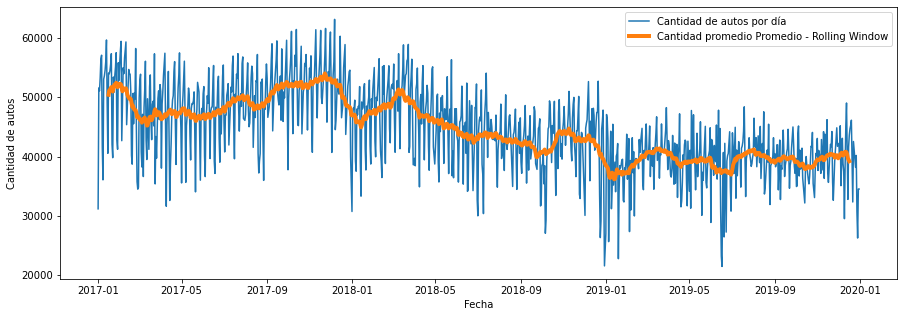

In [39]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de autos por día')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Cantidad promedio Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos')
plt.legend()
plt.show()

No podemos ajustar una regresión lineal con las fechas así como las tenemos, por lo que tenemos que pasarlas a un formato numérico.

In [40]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

hora_fin  cantidad_pasos  fecha_numeros
fecha2                                             
2017-01-01      2976         31183.0         736330
2017-01-02      3713         51568.0         736331
2017-01-03      3573         51093.0         736332
2017-01-04      3909         53332.0         736333
2017-01-05      3820         56486.0         736334

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

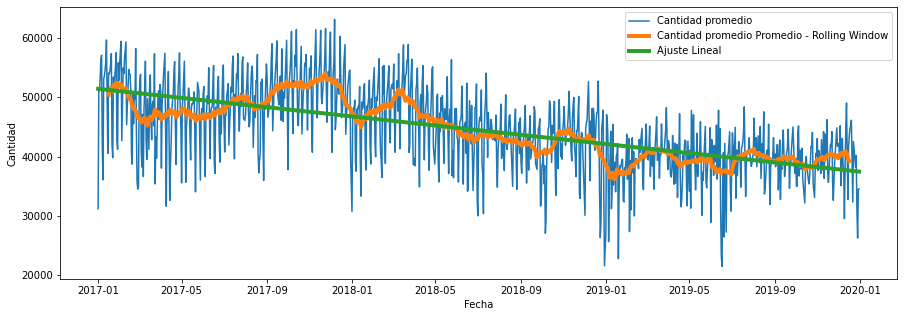

In [42]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad promedio')
plt.plot(semanal_promedio_tendencia, ls = '-', lw = 4, label = 'Cantidad promedio Promedio - Rolling Window')
plt.plot(diario.index, model.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

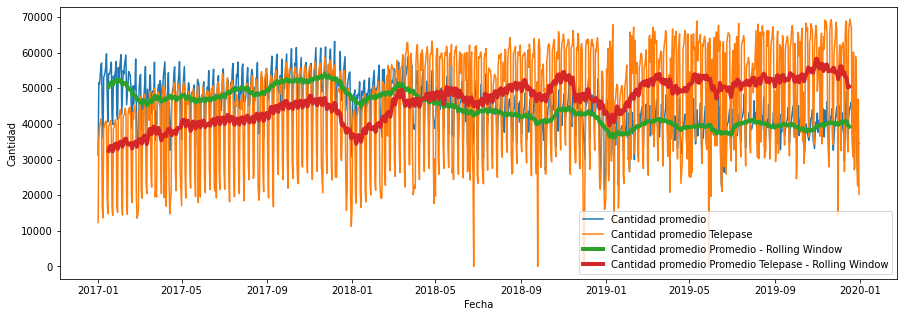

In [43]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad promedio')
plt.plot(diario_telepase.index, diario_telepase.cantidad_pasos, label = 'Cantidad promedio Telepase')
plt.plot(semanal_promedio_tendencia, ls = '-', lw = 4, label = 'Cantidad promedio Promedio - Rolling Window')
plt.plot(semanal_promedio_tendencia_telepase, ls = '-', lw = 4, label = 'Cantidad promedio Promedio Telepase - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

Confirmamos la tendencia negativa de la serie. La misma se debe a cambios a forma de pago "TELEPASE".

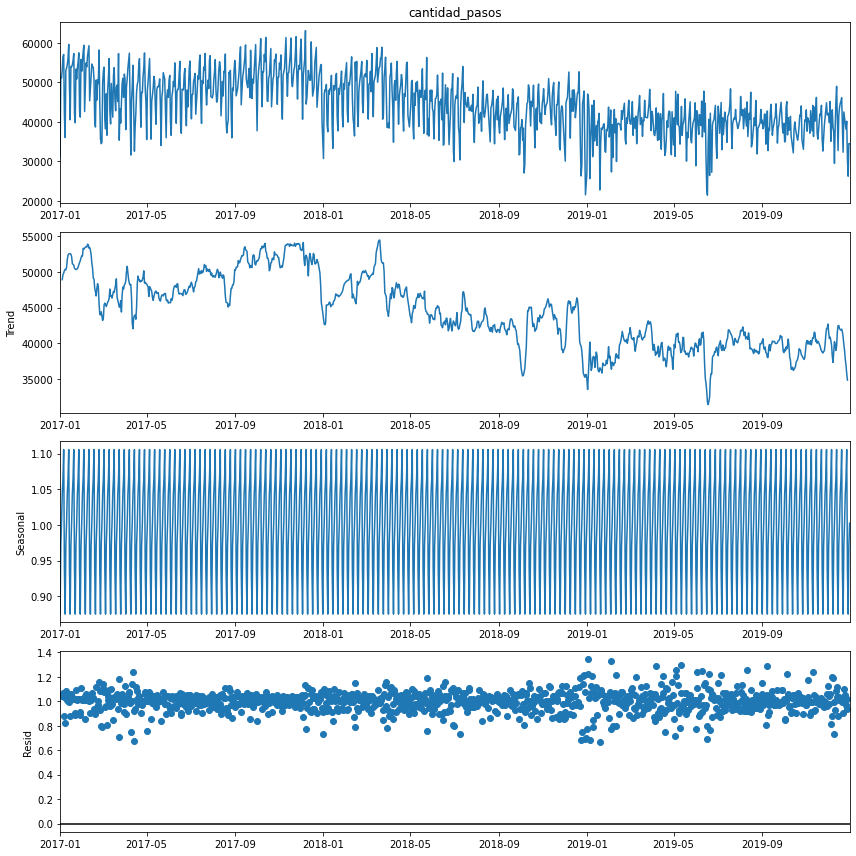

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

matplotlib.rcParams['figure.figsize'] = [12,12]
result = seasonal_decompose(diario.cantidad_pasos, model='multiplicative')
result.plot()
plt.show()

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


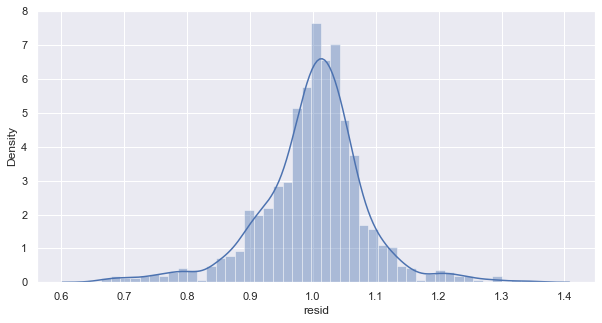

In [45]:
sns.set()
plt.figure(figsize = (10,5))
sns.distplot(result.resid)
plt.show()

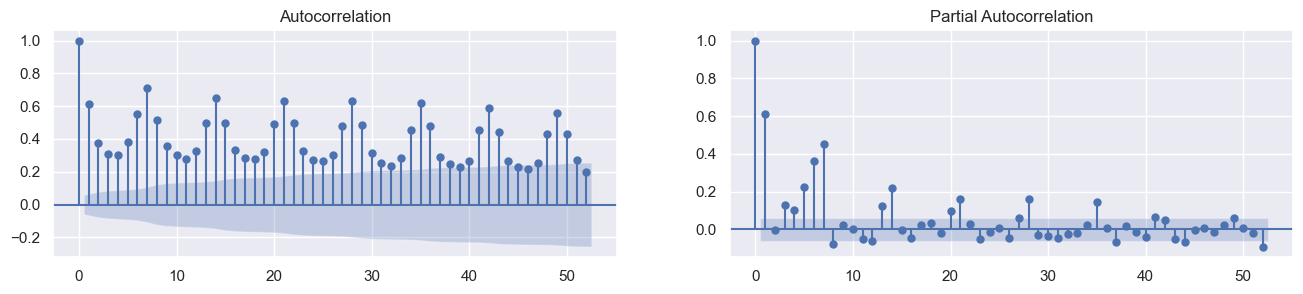

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(diario[['cantidad_pasos']], lags=52, ax=axes[0])
plot_pacf(diario[['cantidad_pasos']], lags=52, ax=axes[1])
plt.show()

La autocorrelación utiliza la correlación de Pearson para ver la correlación de la serie con días anteriores, teniendo en cuenta relaciones directas e indirectas. La primera línea vale uno porque es con el mismo día. Luego observamos claramente como se preserva la estacionalidad, la presencia de un patrón de variación entre una semana y otra.

En la autocorrelación parcial, en la cual se quitan las relaciones indirectas, vemos como el flujo de un día de la semana va a depender del flujo del mismo día de la semana anterior y así sucesivamente. La misma va disminuyendo.

### Estacionaridad

Vamos a ver si la variable cantidad_pasos es una serie de tiempo estacionaria o no utilizando la prueba de Dickey-Fuller aumentada (ADF). Básicamente se evaluará si las propiedades estadísicas de la serie como la media y la  varianza cambian con el tiempo.

In [47]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=14).mean()
    rolstd = timeseries.rolling(window=14).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

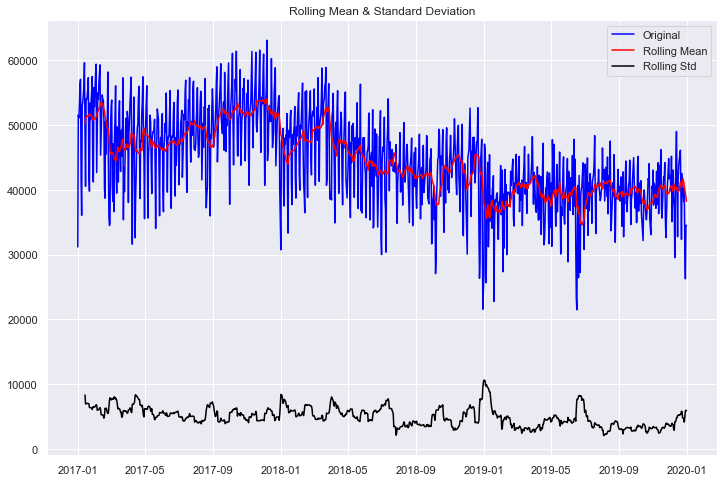

Results of Dickey-Fuller Test:
Test Statistic                   -1.809896
p-value                           0.375560
#Lags Used                       22.000000
Number of Observations Used    1072.000000
Critical Value (1%)              -3.436465
Critical Value (5%)              -2.864240
Critical Value (10%)             -2.568208
dtype: float64


In [48]:
resultado=test_stationarity(diario.cantidad_pasos)


Al comparar el estadístico ADF con los valores críticos, vemos que estos últimos son mas negativos, lo cual nos habla que la serie no es estacionaria. Esto a su vez se confirma con el valor del p-value, que es mayor a 0.05. 

Para las predicciones a futuro, utilizaré en primer lugar métodos no autorregresivos, por lo cual no es necesario convertir la serie en estacionaria.  Sin embargo, como tengo intenciones de utilizar luego ARIMA, voy a generar ambos modelos para luego compararlos.

Una forma de volverla estacionaria es diferenciando la serie:

In [49]:
senial=diario.cantidad_pasos

senial_estacionaria=senial-senial.shift(1)

senial_estacionaria.head()

fecha2
2017-01-01        NaN
2017-01-02    20385.0
2017-01-03     -475.0
2017-01-04     2239.0
2017-01-05     3154.0
Freq: D, Name: cantidad_pasos, dtype: float64

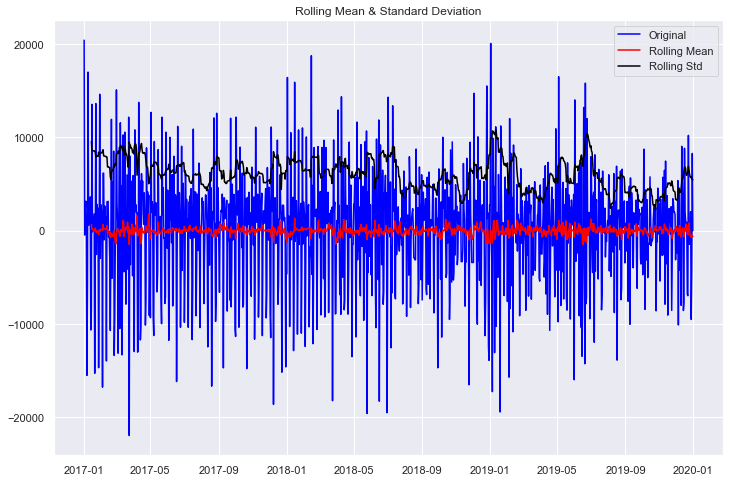

Results of Dickey-Fuller Test:
Test Statistic                -1.072077e+01
p-value                        3.155229e-19
#Lags Used                     2.100000e+01
Number of Observations Used    1.072000e+03
Critical Value (1%)           -3.436465e+00
Critical Value (5%)           -2.864240e+00
Critical Value (10%)          -2.568208e+00
dtype: float64


In [50]:
test_stationarity(senial_estacionaria.dropna(inplace=False))

In [51]:
senial_estacionaria.dropna(inplace=True)

Vemos en este caso como ahora la señal se ha convertido en estacionaria porque el p-value es menor que 0.05 y el estadístico es menos negativo que los valores críticos..

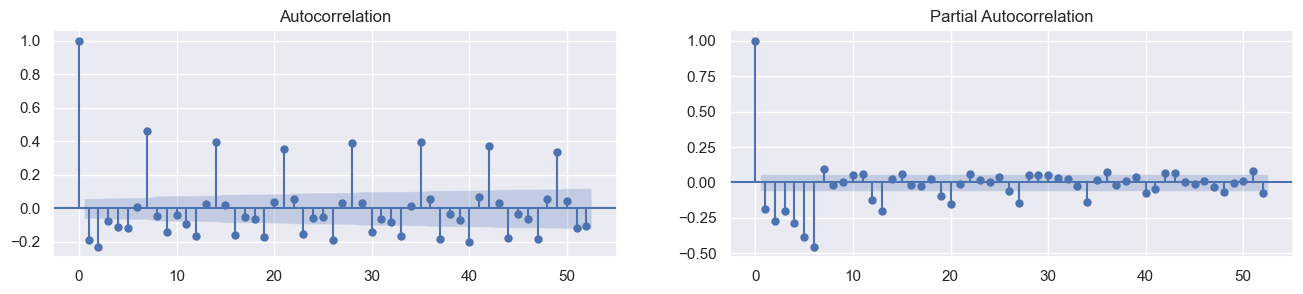

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(senial_estacionaria, lags=52, ax=axes[0])
plot_pacf(senial_estacionaria, lags=52, ax=axes[1])
plt.show()

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

Hay que utilizar los 4 trimestres de 2017, los 4 de 2018 y los 3 de 2019 como set de entrenamiento para predecir el último trimestre de 2019.

Dada una secuencia de números para una serie de tiempo, el principal problema con el que nos encontramos es hacer que los datos se vean como un problema de aprendizaje supervisado. Para ello, dado una observación en el tiempo t, podemos utilizar las observaciones en los tiempos t-1,t-2,...,t-n como variables de entrada para predecir t+1 (variable de salida)

Utilizaré para predecir RandomForest. Como la mayoría de los métodos de aprendizaje automático, no tienen conciencia del tiempo. Por el contrario, consideran que las observaciones son independientes y están distribuidas de manera idéntica. Obviamente, este supuesto se viola en los datos de series de tiempo que se caracterizan por la dependencia en serie. Además, los métodos basados en árboles de decisión no pueden predecir una tendencia, es decir, no extrapolan. 

Vamos a hacer un one-step-prediction,para lo cual procederemos a transformar el dataset.Primero tengo que definir el lookback, es decir, cuantos n valores hacia atrás tomaremos para predecir el siguiente.f En mi caso he definido un lookback de 4 semanas (7*4)

### Señal no diferenciada

In [53]:
#Senñal no diferenciada
senial.head()

fecha2
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [54]:
look_back=7*4

N = senial.shape[0]
X_nd = np.zeros((N - look_back - 1,look_back)) #Voy a generar los arrays para X e Y.
y_nd = np.zeros(N - look_back - 1)
print(X_nd.shape, y_nd.shape)

(1066, 28) (1066,)


In [55]:
for i in range(X_nd.shape[0]):
    X_nd[i,:] = senial.iloc[i:i+look_back]
    y_nd[i] = senial.iloc[i+look_back]
    
print(X_nd)

print(y_nd)

[[31183.         51568.         51093.         ... 55105.
  57506.         42831.        ]
 [51568.         51093.         53332.         ... 57506.
  42831.         41218.        ]
 [51093.         53332.         56486.         ... 42831.
  41218.         55814.        ]
 ...
 [41722.         41968.5        42215.         ... 39622.33333333
  38168.         40182.        ]
 [41968.5        42215.         39820.         ... 38168.
  40182.         30681.        ]
 [42215.         39820.         45181.         ... 40182.
  30681.         26259.        ]]
[41218. 55814. 52842. ... 30681. 26259. 34523.]


#### train_test_split

In [56]:
N_train = 365*2+270- look_back # cantidad de instancias que vamos a usar para entrenar.
N_test = 90 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train_nd = X_nd[:N_train,:]
y_train_nd = y_nd[:N_train]
print(X_train_nd.shape, y_train_nd.shape)

X_test_nd = X_nd[N_train:N_train+N_test,:]
y_test_nd = y_nd[N_train:N_train+N_test]
print(X_test_nd.shape, y_test_nd.shape)

(972, 28) (972,)
(90, 28) (90,)


#### RandomForest

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train_nd,y_train_nd)

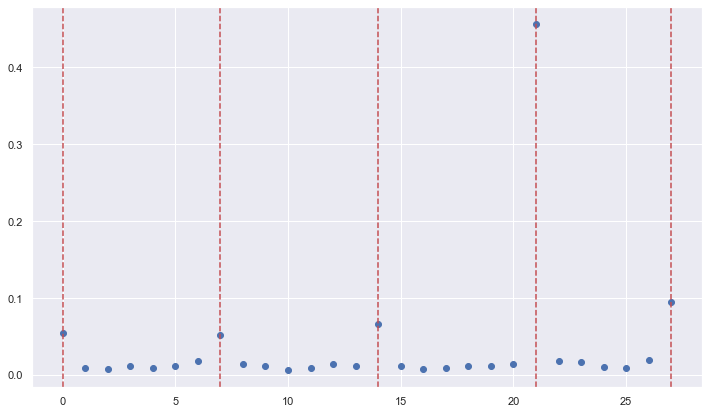

In [58]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in [0,7,14,21,27]:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

El gráfico anterior muestra la importancia de la variables (28 días en este caso). Vemos que el mismo día de la semana anterior es el que mas ayuda a predecir. Esto se condice con lo que fue observado en los gráficos de autocorrelación y autocorrelación parcial.

#### Predicciones

In [59]:
y_pred=rf.predict(X_nd)
y_pred_train=rf.predict(X_train_nd)
y_pred_test=rf.predict(X_test_nd)

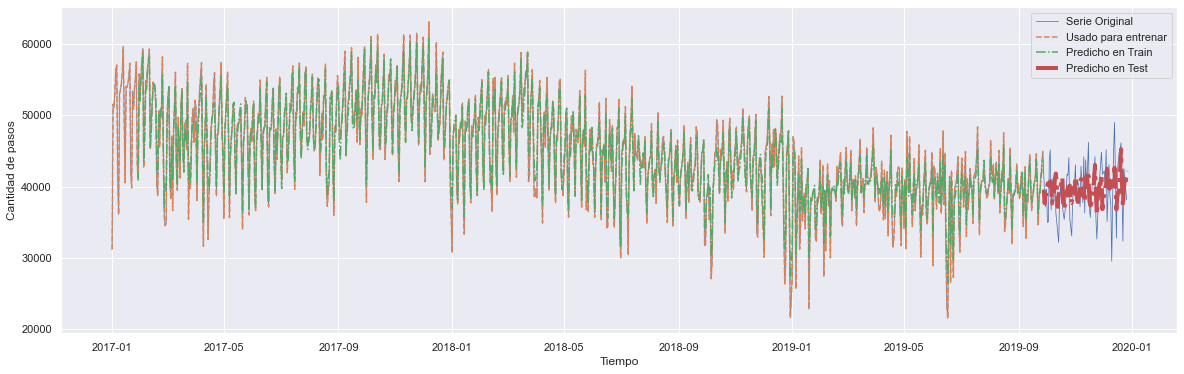

In [60]:
plt.figure(figsize=(20,6))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_pred_train,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_pred_test,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

#### Métricas

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_train_nd, y_pred_train)
print("SEÑAL NO DIFERENCIADA")
print('RMSE en Train 2019:',np.sqrt(MSE))
print('R2_score en Train 2019:',r2_score(y_train_nd,y_pred_train))

MSE = mean_squared_error(y_test_nd, y_pred_test)
print('Error en Test 2019:',np.sqrt(MSE))
print('R2_score en Trest 2019:',r2_score(y_test_nd,y_pred_test))

SEÑAL NO DIFERENCIADA
RMSE en Train 2019: 1593.500547092778
R2_score en Train 2019: 0.9472534890306208
Error en Test 2019: 3336.915145293932
R2_score en Trest 2019: 0.2118249862889824


En este caso estamos utilizando para evaluar el modelo dos métricas: RMSE y R2_score. La primera nos da una idea de cuan alejados o cercanos estan los datos observados de los valores predichos del modelo. Claramente vemos una diferencia grande entre train y test, lo cual nos esta diciendo que nuestro modelo no es el mas adecuado.En cuanto al coeficiente de determinación, claramente nos dice que el modelo explica poco la variabilidad. Esto quiere decir que estamos en un caso de alta varianza.

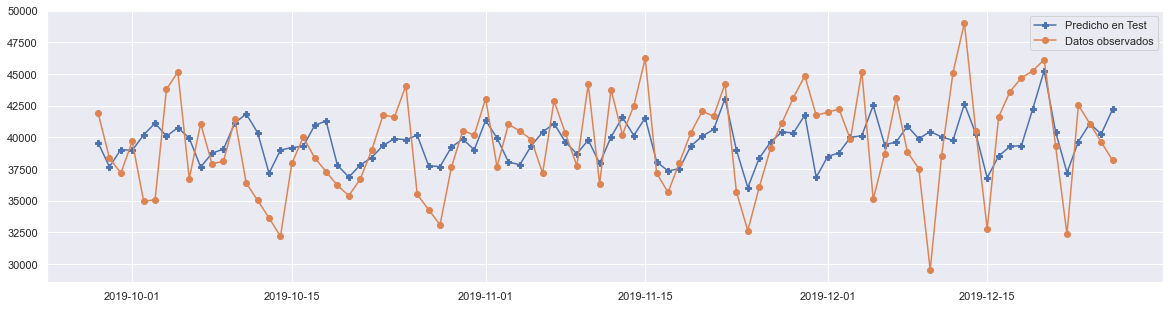

In [62]:
plt.figure(figsize=(20,5))
plt.plot(senial.index[N_train+look_back: length_total], y_pred_test,label = 'Predicho en Test',marker='P')
plt.plot(senial.index[N_train+look_back: length_total], y_test_nd,'-o',label = 'Datos observados')
plt.legend()
plt.show()

En el gráfico anterior se observa con mayor detalle la diferencia entre los valores observados y los predecidos.

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


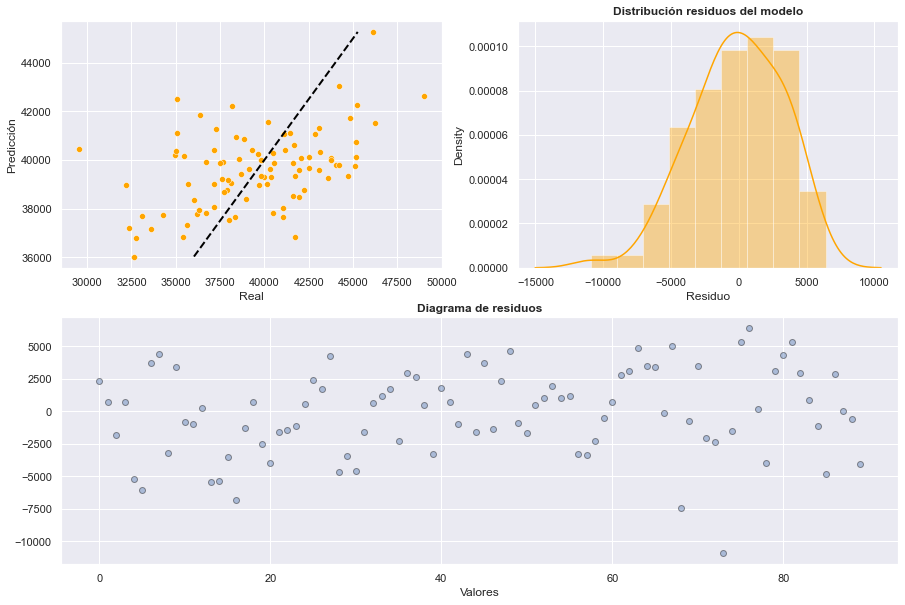

In [63]:
import matplotlib.gridspec as gridspec


gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
sns.scatterplot(y=y_pred_test,x=y_test_nd,color='orange')
plt.plot([y_pred_test.min(), y_pred_test.max()], [y_pred_test.min(),y_pred_test.max()],
                    'k--', color = 'black', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.grid(True)

ax = plt.subplot(gs[0, 1]) # row 0, col 1
sns.distplot(y_test_nd-y_pred_test,color= "orange")

plt.title('Distribución residuos del modelo',fontweight = "bold")
plt.xlabel("Residuo")

ax = plt.subplot(gs[1, :]) # row 1, span all columns
plt.scatter(list(range(len(y_test_nd))), y_test_nd - y_pred_test,
                       edgecolors=(0, 0, 0), alpha = 0.4)
plt.title("Diagrama de residuos",fontweight = "bold")
plt.xlabel('Valores')


plt.show()

Como se puede observar, el modelo no explica la variabilidad y esto lo vemos en la distribución no normal de los errores. Existe un alto grado de dispersión entre los valores observados y los valores predichos. Nuestro modelo no es el más adecuado en este caso.

### Señal diferenciada

In [64]:
#Señal diferenciada
senial_estacionaria.head()

fecha2
2017-01-02    20385.0
2017-01-03     -475.0
2017-01-04     2239.0
2017-01-05     3154.0
2017-01-06      595.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [65]:
look_back=7*4

N = senial_estacionaria.shape[0]
X_d = np.zeros((N - look_back - 1,look_back)) #Voy a generar los arrays para X e Y.
y_d = np.zeros(N - look_back - 1)
print(X_d.shape, y_d.shape)

(1065, 28) (1065,)


In [66]:
for i in range(X_d.shape[0]):
    X_d[i,:] = senial_estacionaria.iloc[i:i+look_back]
    y_d[i] = senial_estacionaria.iloc[i+look_back]
    
print(X_d)

print(y_d)

[[ 20385.           -475.           2239.         ...   2401.
  -14675.          -1613.        ]
 [  -475.           2239.           3154.         ... -14675.
   -1613.          14596.        ]
 [  2239.           3154.            595.         ...  -1613.
   14596.          -2972.        ]
 ...
 [ -3119.            246.5           246.5        ...  -1454.33333333
   -1454.33333333   2014.        ]
 [   246.5           246.5         -2395.         ...  -1454.33333333
    2014.          -9501.        ]
 [   246.5         -2395.           5361.         ...   2014.
   -9501.          -4422.        ]]
[14596. -2972.  2774. ... -9501. -4422.  8264.]


### train_test_split

In [67]:
N_train = 365*2+270- look_back # cantidad de instancias que vamos a usar para entrenar.
N_test = 90 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train_d = X_d[:N_train,:]
y_train_d = y_d[:N_train]
print(X_train_d.shape, y_train_d.shape)

X_test_d = X_d[N_train:N_train+N_test,:]
y_test_d = y_d[N_train:N_train+N_test]
print(X_test_d.shape, y_test_d.shape)

(972, 28) (972,)
(90, 28) (90,)


In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train_d,y_train_d)

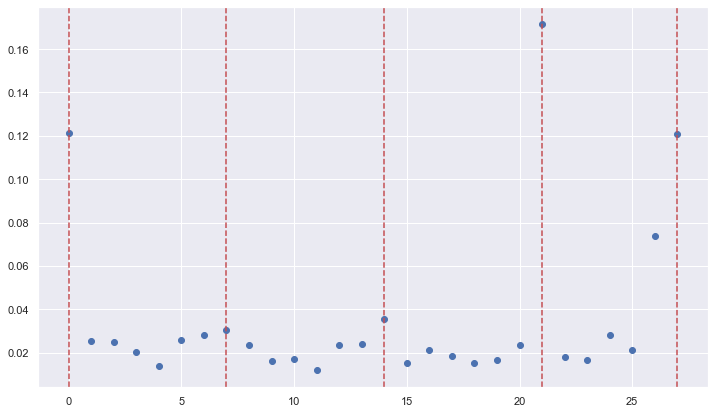

In [69]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in [0,7,14,21,27]:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Vemos que el mismo día de la semana anterior es el que mas ayuda a predecir. Mismas conclusiones que las obtenidas para la señal no diferenciada.

### Predicciones

In [70]:
y_pred=rf.predict(X_d)
y_pred_train=rf.predict(X_train_d)
y_pred_test=rf.predict(X_test_d)

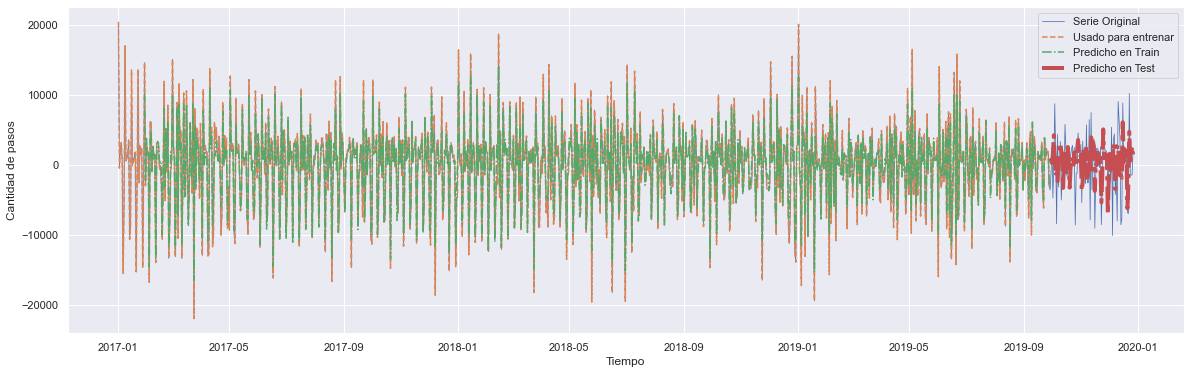

In [71]:
plt.figure(figsize=(20,6))
plt.plot(senial_estacionaria.index[:length_total], senial_estacionaria[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_estacionaria.index[:N_train + look_back], senial_estacionaria[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial_estacionaria.index[look_back: look_back + N_train], y_pred_train,'-.',label = 'Predicho en Train')
plt.plot(senial_estacionaria.index[N_train+look_back: length_total], y_pred_test,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

### Métrica

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_train_d, y_pred_train)
print("SEÑAL DIFERENCIADA")
print('RMSE en Train 2019:',np.sqrt(MSE))
print('R2_score en Train 2019:',r2_score(y_train_d,y_pred_train))

MSE = mean_squared_error(y_test_d, y_pred_test)
print('Error en Test 2019:',np.sqrt(MSE))
print('R2_score en Trest 2019:',r2_score(y_test_d,y_pred_test))

SEÑAL DIFERENCIADA
RMSE en Train 2019: 1762.8438620339205
R2_score en Train 2019: 0.9189271033041464
Error en Test 2019: 3791.404342533151
R2_score en Trest 2019: 0.270425334920786


Nos encontramos en el mismo caso que la señal no diferenciada. El modelo no puede explicar la variabilidad, lo cual viene dado nuevamente por el coeficiente de determinación muy bajo. Existe una gran dispersión entre los datos predichos y los observados. Existe una gran diferencia entre las métricas de test y train

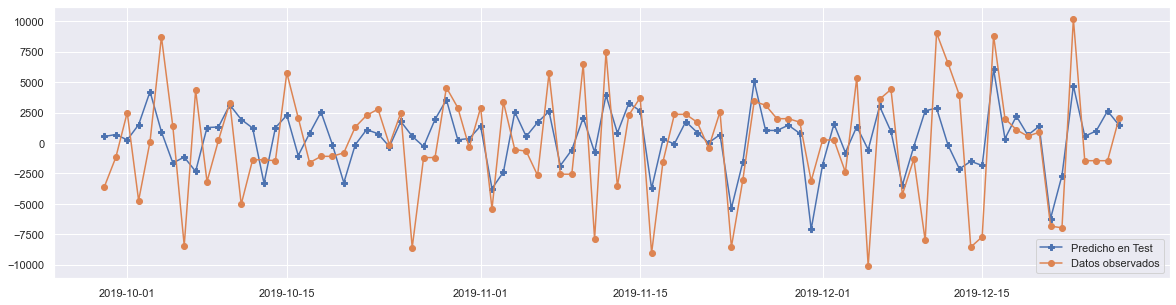

In [73]:
plt.figure(figsize=(20,5))
plt.plot(senial_estacionaria.index[N_train+look_back: length_total], y_pred_test,label = 'Predicho en Test',marker='P')
plt.plot(senial_estacionaria.index[N_train+look_back: length_total], y_test_d,'-o',label = 'Datos observados')
plt.legend()
plt.show()

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


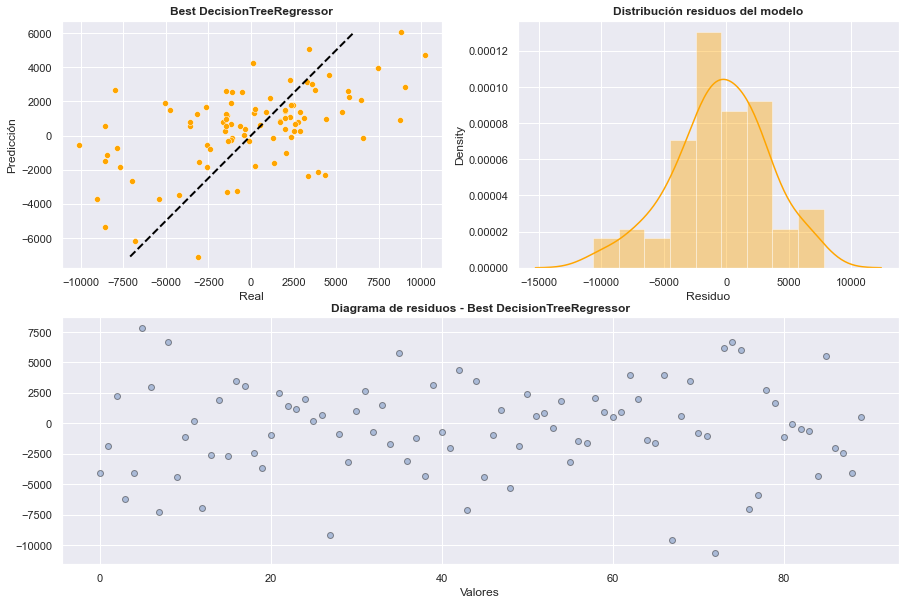

In [74]:
import matplotlib.gridspec as gridspec


gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
sns.scatterplot(y=y_pred_test,x=y_test_d,color='orange')
plt.plot([y_pred_test.min(), y_pred_test.max()], [y_pred_test.min(),y_pred_test.max()],
                    'k--', color = 'black', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.title('Best DecisionTreeRegressor',fontweight = "bold")
plt.grid(True)

ax = plt.subplot(gs[0, 1]) # row 0, col 1
sns.distplot(y_test_d-y_pred_test,color= "orange")

plt.title('Distribución residuos del modelo',fontweight = "bold")
plt.xlabel("Residuo")

ax = plt.subplot(gs[1, :]) # row 1, span all columns
plt.scatter(list(range(len(y_test_d))), y_test_d - y_pred_test,
                       edgecolors=(0, 0, 0), alpha = 0.4)
plt.title("Diagrama de residuos - Best DecisionTreeRegressor",fontweight = "bold")
plt.xlabel('Valores')


plt.show()

El alto grado de dispersión se confirma con el comportamiento sesgado hacia la izquierda del gráfico de distribución de errores.
Sin embargo, es importante aclarar que no se esperaba que las métricas mejoren con la serie diferenciada porque los modelos supervisados, a diferencia de los autoregresivos utilizados en series temporales, como se dijo antes, no tienen conciencia del tiempo.

## Modelo Benchmark

Para el modelo Benchmark se utilizará un método ingenuo: se supone que el valor predicho en el momento t es el valor real de la variable en el momento t-1.

In [75]:
y_test_pred_benchmark = y_d[-1 + N_train:N_train+N_test-1]

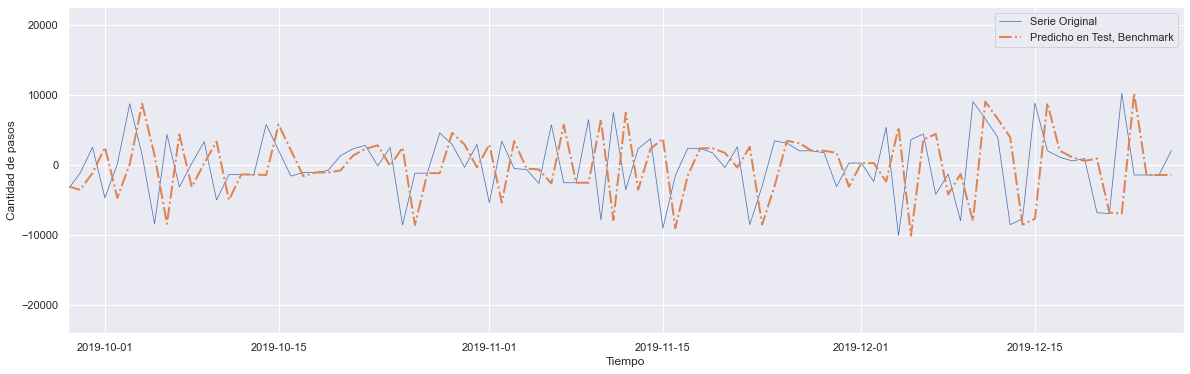

In [76]:
plt.figure(figsize=(20,6))
plt.plot(senial.index[:length_total], senial_estacionaria[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

In [77]:
y_test_pred_benchmark = y_d[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test_d, y_d[-1 + N_train:N_train+N_test - 1])
print("RMSE modelo benchmark: {}".format(np.sqrt(MSE)))

RMSE modelo benchmark: 6946.490215333813


Los resultados obtenidos con el modelo RandomForest fueron mejores que el modelo benchmark, por lo cual se justifica la utilización del algoritmo de aprendizaje supervisado.

### Conversión según la diferenciación

Debo tener en cuenta que estoy trabajando sobre la serie diferenciada, para lo cual puedo volver a la serie original por medio de la siguiente operación

In [78]:
first_value=31183
series_inverted = np.r_[first_value, senial_estacionaria].cumsum().astype('float64')
series_inverted

array([31183., 51568., 51093., ..., 26259., 34523., 34523.])

## Optimización de hiperparámetros

Voy a evaluar dos modelos y voy a obtener los mejores parámetros con GridSearchCV.

No sería válido ajustar el modelo a datos del futuro y hacer que prediga el pasado. El modelo debe estar entrenado en el pasado y predecir el futuro.

Esto significa que los métodos que aleatorizan el conjunto de datos durante la evaluación, como Crossvalidation, no se pueden utilizar. En su lugar se utilizará TimeSeriesSplit, que es una variante e Kfold, la cual retorna los primeros k folds como el set de entrenamiento y el (k+1) fold como el set de testeo.

In [79]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

rf=RandomForestRegressor(random_state=42)
xgb=xgboost.XGBRegressor(random_state=42)

tscv = TimeSeriesSplit(n_splits=5)

In [80]:
modelos_parametros = {'RandomForestRegressor':(rf,{'n_estimators':[50,100,200,300,400,500,600,700,800],
                                                    'max_features':['sqrt','log2','auto']}),
                      'XgBoost': (xgb,{'max_depth' : [3,4,5],
                                          'gamma': [0.5, 1, 1.5, 2, 5],
                                          })}

#### Señal no diferenciada

In [81]:
from sklearn.metrics import r2_score, mean_squared_error

for name, (model, params) in modelos_parametros.items(): 
    
    grid = GridSearchCV(estimator=model, cv=tscv,scoring='neg_mean_squared_error',
                            param_grid=params)
    grid.fit(X_train_nd, y_train_nd)
    y_train_pred = grid.predict(X_train_nd)
    y_test_pred = grid.predict(X_test_nd)
    
    print(grid.best_params_)
    
    MSE = mean_squared_error(y_train_nd, y_train_pred)
    print('RMSE en Train: {}',name,np.sqrt(MSE))
    print('R2 score en Train: {}',name,r2_score(y_train_nd,y_train_pred))
    
    MSE = mean_squared_error(y_test_nd, y_test_pred)
    print('RMSE en Test: {}',name,np.sqrt(MSE))
    print('R2 score en Test: {}',name,r2_score(y_test_nd,y_test_pred))


{'max_features': 'auto', 'n_estimators': 50}
RMSE en Train: {} RandomForestRegressor 1610.6715671302177
R2 score en Train: {} RandomForestRegressor 0.9461106074452493
RMSE en Test: {} RandomForestRegressor 3338.2840197623923
R2 score en Test: {} RandomForestRegressor 0.21117820091832418
{'gamma': 0.5, 'max_depth': 3}
RMSE en Train: {} XgBoost 1485.4924712824536
R2 score en Train: {} XgBoost 0.9541615193811792
RMSE en Test: {} XgBoost 3604.1371193010987
R2 score en Test: {} XgBoost 0.08053553923216727


El modelo que mejores resultados tiene es el RandomForestRegressor. Se han comparado ambas métricas: RMSE y R2 score. Sin embargo, no se han encontrado mejoras sustanciales en las métricas luego del proceso de GridSearch. El modelo sigue teniendo una alta varianza.

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


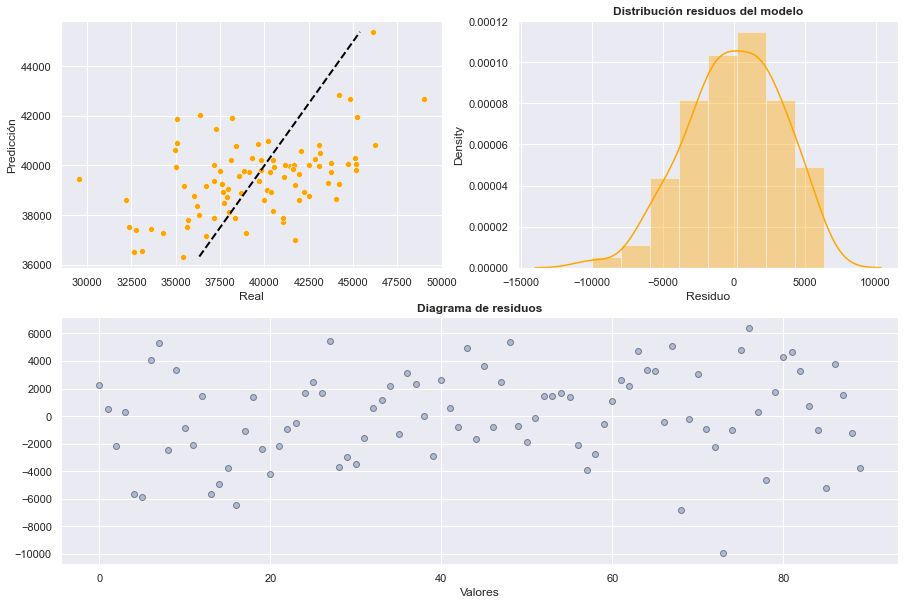

In [82]:
rf=RandomForestRegressor(n_estimators=50,max_features='auto').fit(X_train_nd,y_train_nd)

y_pred=rf.predict(X_nd)
y_pred_train=rf.predict(X_train_nd)
y_pred_test=rf.predict(X_test_nd)

import matplotlib.gridspec as gridspec


gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
sns.scatterplot(y=y_pred_test,x=y_test_nd,color='orange')
plt.plot([y_pred_test.min(), y_pred_test.max()], [y_pred_test.min(),y_pred_test.max()],
                    'k--', color = 'black', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.grid(True)

ax = plt.subplot(gs[0, 1]) # row 0, col 1
sns.distplot(y_test_nd-y_pred_test,color= "orange")

plt.title('Distribución residuos del modelo',fontweight = "bold")
plt.xlabel("Residuo")

ax = plt.subplot(gs[1, :]) # row 1, span all columns
plt.scatter(list(range(len(y_test_nd))), y_test_nd - y_pred_test,
                       edgecolors=(0, 0, 0), alpha = 0.4)
plt.title("Diagrama de residuos",fontweight = "bold")
plt.xlabel('Valores')


plt.show()

Como se mencionó anteriormente, el proceso de GridSearch no ha mejorado el modelo. Esto se sigue observando en el grafico de distribución de errores, el cual tiene un comportamiento no normal, lo cual sugiere que nuestro modelo sigue sin explicar la variabilidad.

## ¿Qué información está usando el modelo para predecir?

La información que esta utilizando el modelo para predecir es la cantidad de pasos en los años 2017, 2018 y primeros 3 trimestres de 2019.
He armado el dataset haciendo one step prediction, es decir, viendo prediciendo un valor adelante utilizando los anteriores. He adaptado la serie de tiempo a un modelo de análisis supervisado.

## Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?

Voy a cargar el dataset del año 2020 y aplicar las mismas transformaciones. Posteriormente concatenaré al dataset que estuve trabajando hasta el momento.

In [83]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

mask=np.logical_and(data_2020.estacion=='ILLIA', np.logical_or(data_2020.forma_pago=='Efectivo', data_2020.observacion=='Efectivo'))
data_2020=data_2020[mask] 
    
data_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

data_2020.head()

fecha    mes        dia  dia_fecha  hora_fin tipo_vehiculo  \
52   2020-01-01 00:00:00  enero  Miércoles        1.0       1.0          Auto   
53   2020-01-01 00:00:00  enero  Miércoles        1.0       1.0          Auto   
134  2020-01-01 00:00:00  enero  Miércoles        1.0       2.0          Auto   
135  2020-01-01 00:00:00  enero  Miércoles        1.0       2.0          Auto   
202  2020-01-01 00:00:00  enero  Miércoles        1.0       3.0          Auto   

    observacion    sentido  cantidad_pasos  
52     Efectivo     Centro           326.0  
53     Efectivo  Provincia           319.0  
134    Efectivo     Centro           199.0  
135    Efectivo  Provincia           180.0  
202    Efectivo     Centro           114.0

In [84]:
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')
data_2020.head()

fecha    mes        dia  dia_fecha  hora_fin tipo_vehiculo  \
52   2020-01-01 00:00:00  enero  Miércoles        1.0       1.0          Auto   
53   2020-01-01 00:00:00  enero  Miércoles        1.0       1.0          Auto   
134  2020-01-01 00:00:00  enero  Miércoles        1.0       2.0          Auto   
135  2020-01-01 00:00:00  enero  Miércoles        1.0       2.0          Auto   
202  2020-01-01 00:00:00  enero  Miércoles        1.0       3.0          Auto   

    observacion    sentido  cantidad_pasos              fecha2  
52     Efectivo     Centro           326.0 2020-01-01 01:00:00  
53     Efectivo  Provincia           319.0 2020-01-01 01:00:00  
134    Efectivo     Centro           199.0 2020-01-01 02:00:00  
135    Efectivo  Provincia           180.0 2020-01-01 02:00:00  
202    Efectivo     Centro           114.0 2020-01-01 03:00:00

In [85]:
#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)

data_2020

fecha        mes        dia  dia_fecha  hora_fin  \
0      2020-01-01 00:00:00      enero  Miércoles        1.0       1.0   
1      2020-01-01 00:00:00      enero  Miércoles        1.0      23.0   
2      2020-01-01 00:00:00      enero  Miércoles        1.0       1.0   
3      2020-01-01 00:00:00      enero  Miércoles        1.0       1.0   
4      2020-01-01 00:00:00      enero  Miércoles        1.0       2.0   
...                    ...        ...        ...        ...       ...   
52369           2020-12-31  diciembre     Jueves       31.0      18.0   
52370           2020-12-31  diciembre     Jueves       31.0      19.0   
52371           2020-12-31  diciembre     Jueves       31.0      19.0   
52372           2020-12-31  diciembre     Jueves       31.0      13.0   
52373           2020-12-31  diciembre     Jueves       31.0      19.0   

          tipo_vehiculo observacion    sentido  cantidad_pasos  \
0                  Auto    Efectivo     Centro           326.0   
1       Pago Doble Auto    Efectivo  Provincia             2.0   
2        Pesados 2 Ejes    Efectivo     Centro             1.0   
3        Pesados 2 Ejes    Efectivo  Provincia             2.0   
4        Pesados 2 Ejes    Efectivo     Centro             2.0   
...                 ...         ...        ...             ...   
52369              Moto    Efectivo  Provincia            16.0   
52370              Moto    Efectivo     Centro            13.0   
52371              Moto    Efectivo  Provincia             8.0   
52372              Moto    Efectivo  Provincia            18.0   
52373  Auto con trailer    Efectivo     Centro             1.0   

                   fecha2  
0     2020-01-01 01:00:00  
1     2020-01-01 23:00:00  
2     2020-01-01 01:00:00  
3     2020-01-01 01:00:00  
4     2020-01-01 02:00:00  
...                   ...  
52369 2020-12-31 18:00:00  
52370 2020-12-31 19:00:00  
52371 2020-12-31 19:00:00  
52372 2020-12-31 13:00:00  
52373 2020-12-31 19:00:00  

[52374 rows x 10 columns]

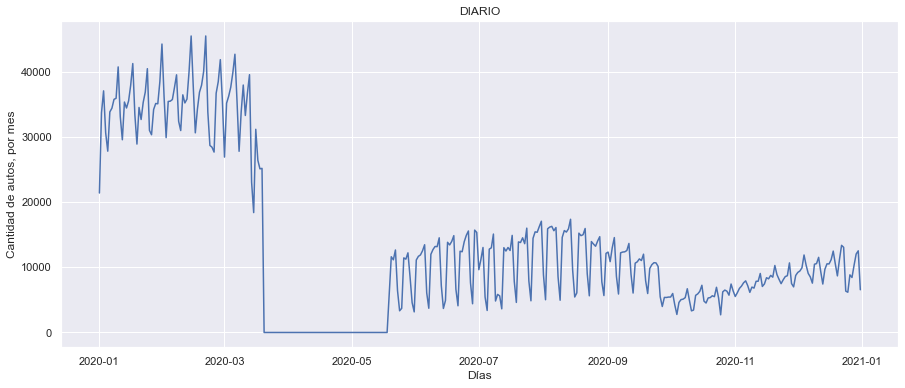

In [86]:
diario_2020 = data_2020.resample('D', on = 'fecha2').sum()

plt.figure(figsize = (15,6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos)
plt.xlabel('Días')
plt.ylabel('Cantidad de autos, por mes')
plt.title('DIARIO')
plt.show()

In [87]:
diario_2020.drop(['dia_fecha','hora_fin'],axis=1,inplace=True)
diario_2020.head()

cantidad_pasos
fecha2                    
2020-01-01         21395.0
2020-01-02         33722.0
2020-01-03         37067.0
2020-01-04         30627.0
2020-01-05         27812.0

In [88]:
senial=pd.DataFrame(senial,columns=['cantidad_pasos'])
senial.head()

cantidad_pasos
fecha2                    
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0

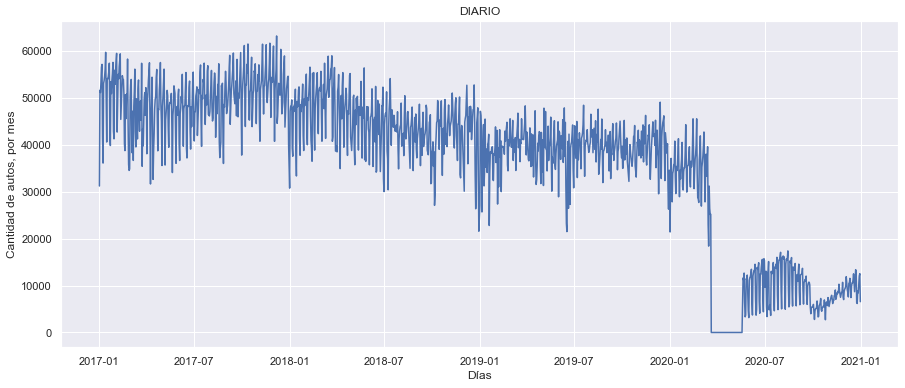

In [89]:
dataset_nuevo=pd.concat([senial,diario_2020],axis=0)

plt.figure(figsize = (15,6))
plt.plot(dataset_nuevo.index, dataset_nuevo.cantidad_pasos)
plt.xlabel('Días')
plt.ylabel('Cantidad de autos, por mes')
plt.title('DIARIO')
plt.show()

Al agregar el 2020 claramente vemos un periodo en el cual no hay registros de pasos en el peaje. Luego se comienza a normalizar a partir de junio, pero el ritmo no es el mismo que el de años anteriores. Esto claramente puede deberse a la pandemia de COVID.
Voy a trabajar directamente sobre la serie no diferenciada.

In [90]:
senial_2020=dataset_nuevo.cantidad_pasos
senial_2020.head()

fecha2
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

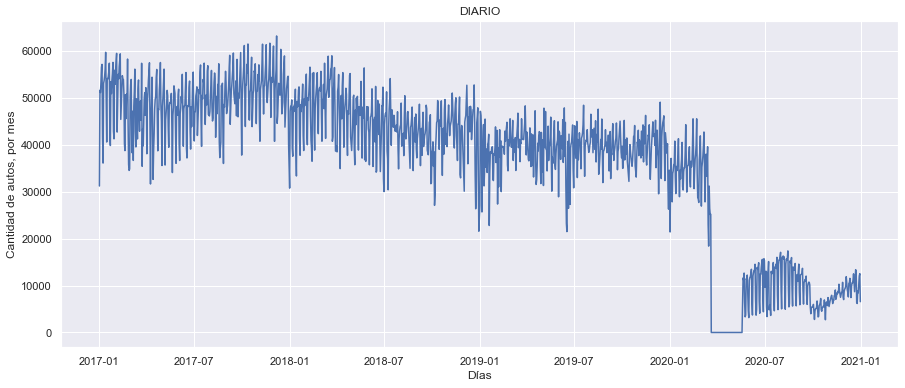

In [91]:
plt.figure(figsize = (15,6))
plt.plot(senial_2020.index, senial_2020)
plt.xlabel('Días')
plt.ylabel('Cantidad de autos, por mes')
plt.title('DIARIO')
plt.show()

In [92]:
look_back=7*4

N = senial_2020.shape[0]
X = np.zeros((N - look_back - 1,look_back)) #Voy a generar los arrays para X e Y.
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1432, 28) (1432,)


In [93]:
for i in range(X.shape[0]):
    X[i,:] = senial_2020.iloc[i:i+look_back]
    y[i] = senial_2020.iloc[i+look_back]
    
print(X)

print(y)

[[31183. 51568. 51093. ... 55105. 57506. 42831.]
 [51568. 51093. 53332. ... 57506. 42831. 41218.]
 [51093. 53332. 56486. ... 42831. 41218. 55814.]
 ...
 [ 8748.  9211.  9431. ...  6172.  8840.  8434.]
 [ 9211.  9431.  9919. ...  8840.  8434. 10311.]
 [ 9431.  9919. 11888. ...  8434. 10311. 12036.]]
[41218. 55814. 52842. ... 10311. 12036. 12527.]


In [94]:
N_train = 365*3- look_back # cantidad de instancias que vamos a usar para entrenar.
N_test = 360 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1067, 28) (1067,)
(360, 28) (360,)


### Utilizando el mismo modelo anterior

In [95]:
y_pred=rf.predict(X)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

MSE = mean_squared_error(y_train, y_pred_train)
print('RMSE en Train 2020:',np.sqrt(MSE))
print('R2 score en Train 2020:',r2_score(y_train,y_pred_train))

MSE = mean_squared_error(y_test, y_pred_test)
print('RMSE en Test 2020:',np.sqrt(MSE))
print('R2 score en Test 2020:',r2_score(y_test,y_pred_test))

RMSE en Train 2020: 1886.257634163365
R2 score en Train 2020: 0.925654558128483
RMSE en Test 2020: 22028.84768924929
R2 score en Test 2020: -2.209854575020424


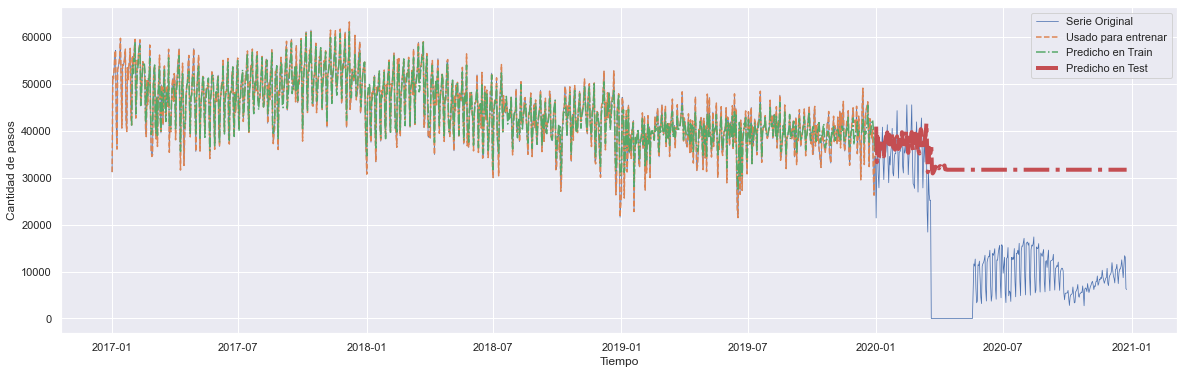

In [96]:
plt.figure(figsize=(20,6))
plt.plot(senial_2020.index[:length_total], senial_2020[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_2020.index[:N_train + look_back], senial_2020[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial_2020.index[look_back: look_back + N_train], y_pred_train,'-.',label = 'Predicho en Train')
plt.plot(senial_2020.index[N_train+look_back: length_total], y_pred_test,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Claramente se observa que las predicciones son mas o menos acertadas únicamente en el primer trimestre. Luego tenemos contexto COVID, por lo cual es esperable que las métricas den bastante alejadas de lo esperable.

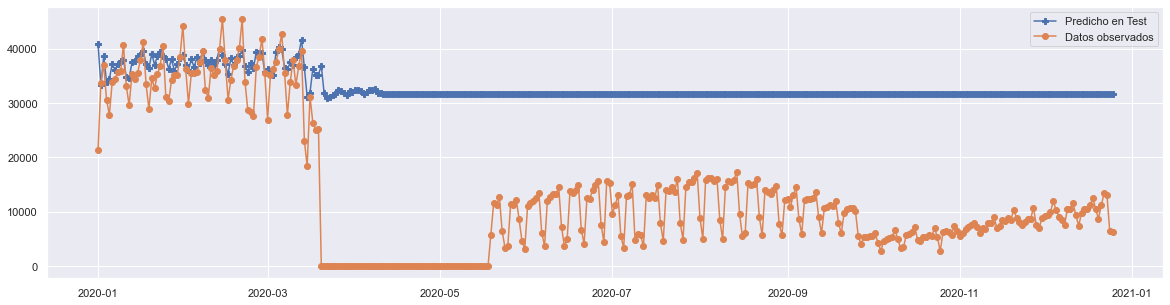

In [97]:
plt.figure(figsize=(20,5))
plt.plot(senial_2020.index[N_train+look_back: length_total], y_pred_test,label = 'Predicho en Test',marker='P')
plt.plot(senial_2020.index[N_train+look_back: length_total], y_test,'-o',label = 'Datos observados')
plt.legend()
plt.show()

Claramente podemos observar que el modelo no pudo predecir correctamente los valores a partir de marzo.

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


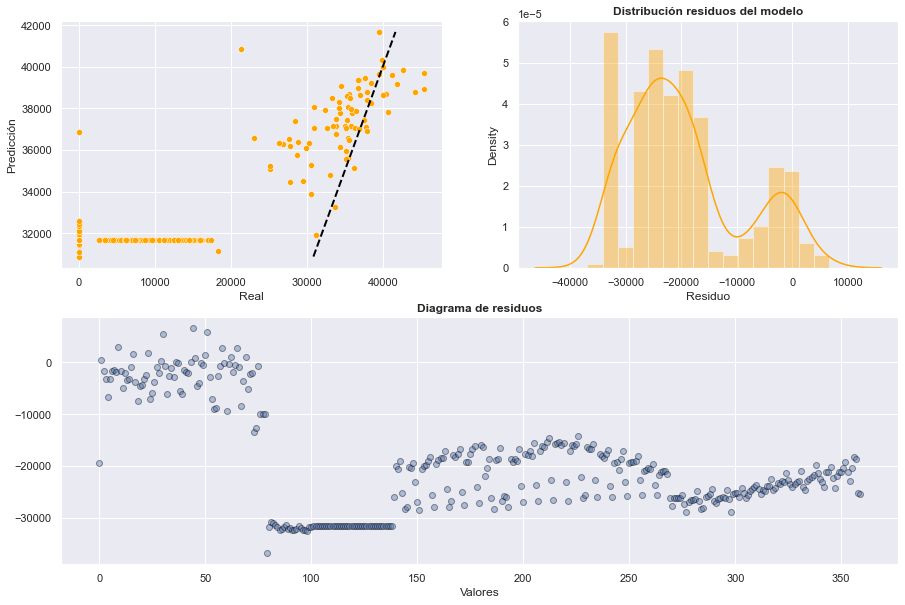

In [98]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
sns.scatterplot(y=y_pred_test,x=y_test,color='orange')
plt.plot([y_pred_test.min(), y_pred_test.max()], [y_pred_test.min(),y_pred_test.max()],
                    'k--', color = 'black', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')

ax = plt.subplot(gs[0, 1]) # row 0, col 1
sns.distplot(y_test-y_pred_test,color= "orange")

plt.title('Distribución residuos del modelo',fontweight = "bold")
plt.xlabel("Residuo")

ax = plt.subplot(gs[1, :]) # row 1, span all columns
plt.scatter(list(range(len(y_test))), y_test - y_pred_test,
                       edgecolors=(0, 0, 0), alpha = 0.4)
plt.title("Diagrama de residuos",fontweight = "bold")
plt.xlabel('Valores')

plt.show()

 Un modelo válido implica encontrar un patrón de residuos al azar, es decir, que no haya sesgos en los residuos (tendencia) ni una dispersión (varianza) no constante ni valores que desvién el comportamiento observado. En este caso vemos algunas predicciones que están bastante alejadas de los valores reales, y esto lo confirmamos con el diagrama de residuos. Existe alta dispersión: en la distribución del error vemos dos picos, por lo cual claramente no es normal. Tenemos claramente diferenciadas las zonas de las predicciones: primer trimestre y resto del año.

### Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

Voy agregar los datos correspondiente a los años 2015 y 2016 para predecir los del último trimestre de 2019. Como vimos en el punto anterior, no tiene sentido predecir 2020 por las circunstancias generadas por la pandemia.

In [99]:
data_2015=pd.read_csv('flujo-vehicular-2015.csv',sep=',')
data_2016=pd.read_csv('flujo-vehicular-2016.csv',sep=',')

print(data_2015.info())
print(data_2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017958 entries, 0 to 1017957
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1017958 non-null  int64 
 1   fecha           1017958 non-null  object
 2   hora            1017958 non-null  int64 
 3   dia             1017958 non-null  object
 4   estacion        1017958 non-null  object
 5   tipo_vehiculo   1017958 non-null  object
 6   forma_pago      1017958 non-null  object
 7   cantidad_pasos  1017958 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 62.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 

In [100]:
data_2015['fecha2']=pd.to_datetime(data_2015.fecha)+ pd.to_timedelta(data_2015.hora.astype(int),unit='hours')
data_2016['fecha2']=pd.to_datetime(data_2016.fecha)+ pd.to_timedelta(data_2016.hora_fin,unit='h')

data_2015.head()

periodo       fecha  hora     dia estacion tipo_vehiculo  forma_pago  \
0     2015  2015-01-01     0  Jueves  Alberdi       Liviano  NO COBRADO   
1     2015  2015-01-01     0  Jueves  Alberdi       Liviano    EFECTIVO   
2     2015  2015-01-01     0  Jueves  Alberdi       Liviano      EXENTO   
3     2015  2015-01-01     0  Jueves  Alberdi       Liviano    EFECTIVO   
4     2015  2015-01-01     0  Jueves  Alberdi       Liviano      AUPASS   

   cantidad_pasos     fecha2  
0              15 2015-01-01  
1               1 2015-01-01  
2               1 2015-01-01  
3              68 2015-01-01  
4              18 2015-01-01

In [101]:
data_2016.head()

periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
1     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
2     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
3     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
4     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos              fecha2  
0       Liviano  NO COBRADO              32 2016-01-01 01:00:00  
1       Liviano      AUPASS               9 2016-01-01 01:00:00  
2       Liviano  NO COBRADO               1 2016-01-01 02:00:00  
3       Liviano    EFECTIVO               4 2016-01-01 02:00:00  
4       Liviano      EXENTO               3 2016-01-01 02:00:00

In [102]:
print(data_2015.forma_pago.unique())
print(data_2015.estacion.unique())

['NO COBRADO' 'EFECTIVO' 'EXENTO' 'AUPASS' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 'Dellepiane Centro' 'Salguero']


In [103]:
mask2015=np.logical_and(data_2015.forma_pago=='EFECTIVO',data_2015.estacion=='Illia')

data_2015=data_2015[mask2015]
data_2015.head()

periodo       fecha  hora     dia estacion tipo_vehiculo forma_pago  \
998      2015  2015-01-01     0  Jueves    Illia       Liviano   EFECTIVO   
1000     2015  2015-01-01     0  Jueves    Illia       Liviano   EFECTIVO   
1004     2015  2015-01-01     0  Jueves    Illia        Pesado   EFECTIVO   
1007     2015  2015-01-01     1  Jueves    Illia       Liviano   EFECTIVO   
1010     2015  2015-01-01     1  Jueves    Illia       Liviano   EFECTIVO   

      cantidad_pasos              fecha2  
998                3 2015-01-01 00:00:00  
1000              71 2015-01-01 00:00:00  
1004               1 2015-01-01 00:00:00  
1007              23 2015-01-01 01:00:00  
1010             926 2015-01-01 01:00:00

In [104]:
#Reordenamos el dataset por fecha

data_2015.sort_values('fecha', inplace = True)
data_2015.reset_index(drop=True, inplace = True)

diario_2015 = data_2015.resample('D', on = 'fecha2').sum()

diario_2015.drop(['periodo','hora'],axis=1,inplace=True)

diario_2015.head()

cantidad_pasos
fecha2                    
2015-01-01           25697
2015-01-02           38112
2015-01-03           27601
2015-01-04           33803
2015-01-05           48683

In [105]:
print(data_2016.forma_pago.unique())
print(data_2016.estacion.unique())

['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [106]:
mask2016=np.logical_and(data_2016.forma_pago=='EFECTIVO',data_2016.estacion=='Illia')

data_2016=data_2016[mask2016]
data_2016.head()

periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
1700     2016  2016-01-01            3         4  Viernes    Illia  Centro   
1703     2016  2016-01-01            3         4  Viernes    Illia  Centro   
1708     2016  2016-01-01            3         4  Viernes    Illia  Centro   
1711     2016  2016-01-01            4         5  Viernes    Illia  Centro   
1712     2016  2016-01-01            4         5  Viernes    Illia  Centro   

     tipo_vehiculo forma_pago  cantidad_pasos              fecha2  
1700       Liviano   EFECTIVO               3 2016-01-01 04:00:00  
1703       Liviano   EFECTIVO             446 2016-01-01 04:00:00  
1708        Pesado   EFECTIVO               8 2016-01-01 04:00:00  
1711       Liviano   EFECTIVO              10 2016-01-01 05:00:00  
1712       Liviano   EFECTIVO             396 2016-01-01 05:00:00

In [107]:
#Reordenamos el dataset por fecha

data_2016.sort_values('fecha', inplace = True)
data_2016.reset_index(drop=True, inplace = True)

diario_2016 = data_2016.resample('D', on = 'fecha2').sum()

diario_2016.drop(['periodo','hora_inicio','hora_fin'],axis=1,inplace=True)

diario_2016.head()

cantidad_pasos
fecha2                    
2016-01-01           25602
2016-01-02           36136
2016-01-03           37225
2016-01-04           50312
2016-01-05           49907

In [108]:
diario_2015_2016=pd.concat([diario_2015,diario_2016],axis=0)

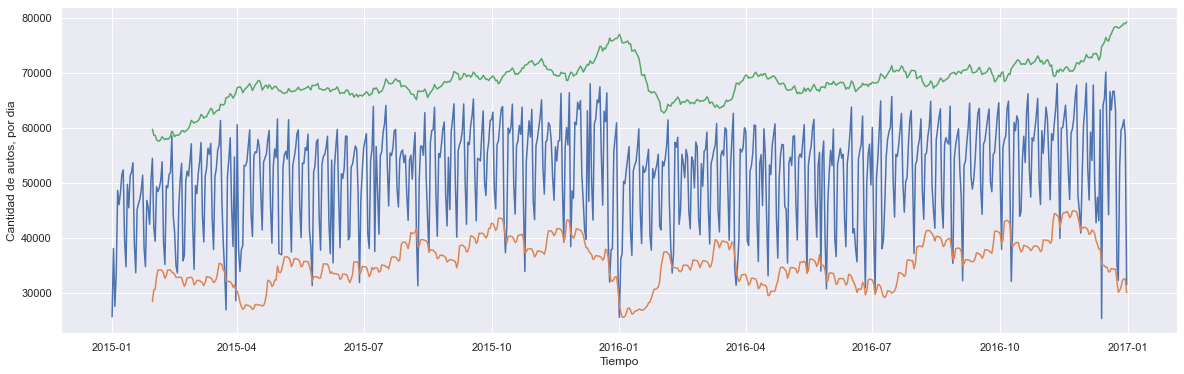

In [109]:
#Defino una ventana de 30 días

wind =30
sigma = 2

diario_2015_2016["inferior"] = diario_2015_2016.cantidad_pasos.rolling(window=wind)\
    .mean() - (sigma * diario_2015_2016.cantidad_pasos.rolling(window=wind).std())
diario_2015_2016["superior"] = diario_2015_2016.cantidad_pasos.rolling(window=wind)\
    .mean() + (sigma * diario_2015_2016.cantidad_pasos.rolling(window=wind).std())

diario_2015_2016['anom']=diario_2015_2016.apply(lambda x: x['cantidad_pasos'] if (x['cantidad_pasos'] <= x['inferior'] or x['cantidad_pasos']>=x['superior'] ) else 0,axis=1)

plt.figure(figsize = (20,6))
plt.plot(diario_2015_2016.index, diario_2015_2016.cantidad_pasos)
plt.plot(diario_2015_2016.index, diario_2015_2016.inferior)
plt.plot(diario_2015_2016.index, diario_2015_2016.superior)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

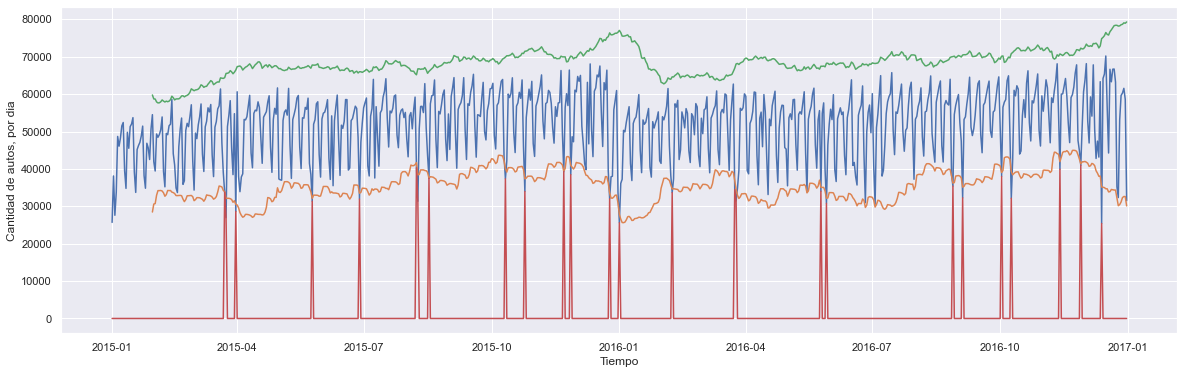

In [110]:
plt.figure(figsize = (20,6))
plt.plot(diario_2015_2016.index, diario_2015_2016.cantidad_pasos)
plt.plot(diario_2015_2016.index, diario_2015_2016.inferior)
plt.plot(diario_2015_2016.index, diario_2015_2016.superior)
plt.plot(diario_2015_2016.index, diario_2015_2016.anom)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [111]:
diario_2015_2016.loc[diario_2015_2016.anom!=0]

cantidad_pasos      inferior      superior     anom
fecha2                                                         
2015-03-23           33786  33909.903930  64411.096070  33786.0
2015-03-24           26970  32126.210654  65537.522680  26970.0
2015-03-31           28618  30529.897328  66449.169339  28618.0
2015-05-25           31370  32096.360370  67794.372964  31370.0
2015-06-28           31931  33495.732354  65993.600979  31931.0
2015-08-08           40310  41689.279595  65170.787071  40310.0
2015-08-09           31343  38417.520757  66755.612576  31343.0
2015-08-17           37488  37498.395204  66087.804796  37488.0
2015-10-11           37353  40078.106536  69902.093464  37353.0
2015-10-25           33966  37344.005082  71465.728251  33966.0
2015-11-22           39254  39427.897600  69968.102400  39254.0
2015-11-27           38463  40941.762603  70177.104063  38463.0
2015-12-25           32003  33594.483132  76379.516868  32003.0
2016-01-01           25602  27815.943460  77049.189874  25602.0
2016-02-08           33661  34635.947653  64624.119013  33661.0
2016-03-24           34499  36906.949232  66936.784102  34499.0
2016-03-25           31431  34573.020120  68090.246546  31431.0
2016-05-25           34024  35063.819494  67475.713840  34024.0
2016-05-29           30796  32161.136691  68258.863309  30796.0
2016-08-28           35412  36205.497930  70042.102070  35412.0
2016-09-04           32258  35122.687383  70466.445951  32258.0
2016-10-02           37978  39035.972767  70138.293900  37978.0
2016-10-09           32152  39293.232984  70837.767016  32152.0
2016-11-13           39932  41925.147316  70749.319350  39932.0
2016-11-28           40938  41345.240452  72294.426215  40938.0
2016-12-13           25400  35160.913692  74841.419641  25400.0

Muchas "anomalías" en este caso coinciden con días festivos. No las voy a eliminar como hice en los años 2017-2019

In [112]:
diario_2015_2016.loc[diario_2015_2016.cantidad_pasos==0]

Empty DataFrame
Columns: [cantidad_pasos, inferior, superior, anom]
Index: []

Tampoco se observan valores nulos

In [113]:
diario_2015_2016.drop(['inferior','superior','anom'],axis=1,inplace=True)

In [114]:
diario_2015_2016.isnull().sum()

cantidad_pasos    0
dtype: int64

Voy a unir todo en un solo dataset, incluyendo la totalidad de pasos entre 2015 y 2019

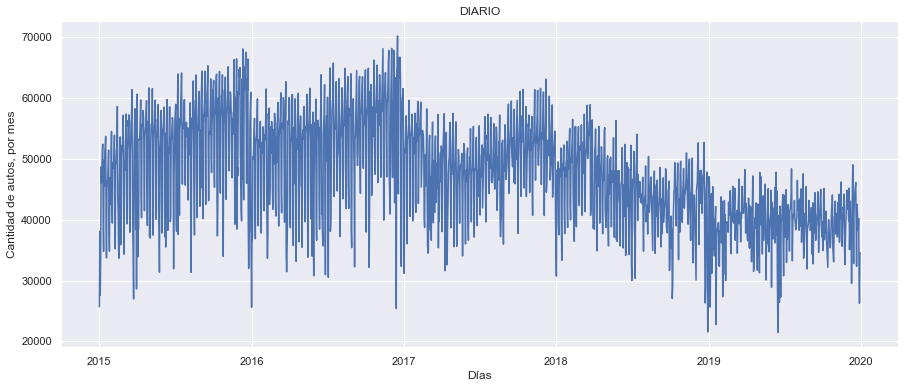

In [115]:
dataset_2015_2019=pd.concat([diario_2015_2016,senial],axis=0)

plt.figure(figsize = (15,6))
plt.plot(dataset_2015_2019.index, dataset_2015_2019.cantidad_pasos)
plt.xlabel('Días')
plt.ylabel('Cantidad de autos, por mes')
plt.title('DIARIO')
plt.show()

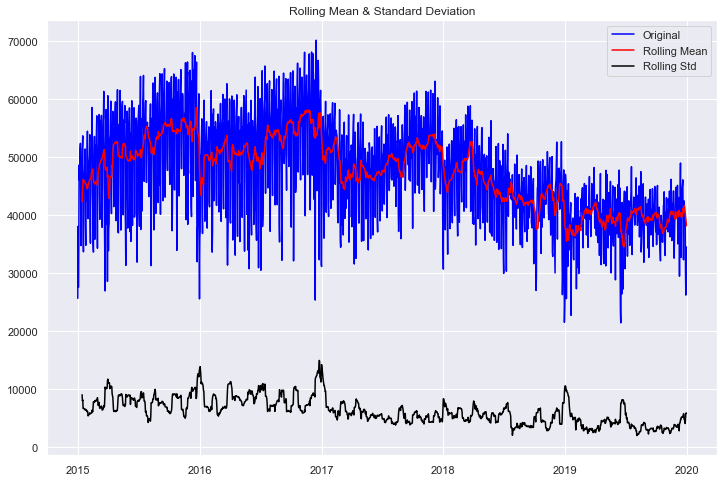

Results of Dickey-Fuller Test:
Test Statistic                   -1.917709
p-value                           0.323777
#Lags Used                       21.000000
Number of Observations Used    1804.000000
Critical Value (1%)              -3.433980
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567624
dtype: float64


In [116]:
resultado=test_stationarity(dataset_2015_2019.cantidad_pasos)

Como es esperable, la señal sigue siendo no estacionaria. Voy a generar una versión estacionaria y otra no estacionaria de la serie. Nuevamente en este caso voy a diferenciarla para obtener la versión estacionaria.

In [117]:
senial_2015_2019=dataset_2015_2019.cantidad_pasos

senial_estacionaria_2015_2019=senial_2015_2019-senial_2015_2019.shift(1)

senial_estacionaria_2015_2019.dropna(inplace=True)

#senial_estacionaria_2015_2019=pd.DataFrame(senial_estacionaria_2015_2019,columns=['cantidad_pasos'])

senial_estacionaria_2015_2019.head()

fecha2
2015-01-02    12415.0
2015-01-03   -10511.0
2015-01-04     6202.0
2015-01-05    14880.0
2015-01-06    -2604.0
Freq: D, Name: cantidad_pasos, dtype: float64

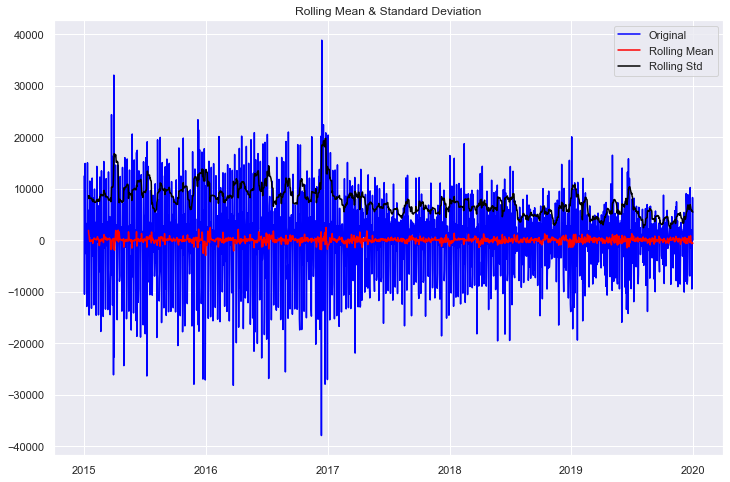

Results of Dickey-Fuller Test:
Test Statistic                -1.331436e+01
p-value                        6.648884e-25
#Lags Used                     2.500000e+01
Number of Observations Used    1.799000e+03
Critical Value (1%)           -3.433990e+00
Critical Value (5%)           -2.863148e+00
Critical Value (10%)          -2.567626e+00
dtype: float64


In [118]:
resultado=test_stationarity(senial_estacionaria_2015_2019)

Voy a armar el dataset con el cual voy a entrenar el modelo utilizando la señal no estacionaria. Nuevamente voy a predecir el último trimestre de 2019 para comparar si la inclusión de los datos mejora o no las métricas.

In [119]:
senial_2015_2019.head()

fecha2
2015-01-01    25697.0
2015-01-02    38112.0
2015-01-03    27601.0
2015-01-04    33803.0
2015-01-05    48683.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [120]:
look_back=7*4

N = senial_2015_2019.shape[0]
X = np.zeros((N - look_back - 1,look_back)) #Voy a generar los arrays para X e Y.
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1797, 28) (1797,)


In [121]:
for i in range(X.shape[0]):
    X[i,:] = senial_2015_2019.iloc[i:i+look_back]
    y[i] = senial_2015_2019.iloc[i+look_back]
    
print(X)

print(y)

[[25697.         38112.         27601.         ... 46866.
  45604.         42512.        ]
 [38112.         27601.         33803.         ... 45604.
  42512.         50677.        ]
 [27601.         33803.         48683.         ... 42512.
  50677.         54511.        ]
 ...
 [41722.         41968.5        42215.         ... 39622.33333333
  38168.         40182.        ]
 [41968.5        42215.         39820.         ... 38168.
  40182.         30681.        ]
 [42215.         39820.         45181.         ... 40182.
  30681.         26259.        ]]
[50677. 54511. 41931. ... 30681. 26259. 34523.]


In [122]:
N_train = 365*4+270- look_back # cantidad de instancias que vamos a usar para entrenar.
N_test = 90 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1702, 28) (1702,)
(90, 28) (90,)


In [123]:
from sklearn.metrics import r2_score

for name, (model, params) in modelos_parametros.items():    
    grid = GridSearchCV(estimator=model, cv=tscv,scoring='neg_mean_squared_error',
                            param_grid=params)
    grid.fit(X_train, y_train)
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)
    
    print(grid.best_params_)
    
    MSE = mean_squared_error(y_train, y_train_pred)
    print('RMSE en Train: {}',name,np.sqrt(MSE))
    print('R2 score en Train: {}',name,r2_score(y_train,y_train_pred))
    
    MSE = mean_squared_error(y_test, y_test_pred)
    print('RMSE en Test: {}',name,np.sqrt(MSE))
    print('R2 scoreen Test: {}',name,r2_score(y_test,y_test_pred))


{'max_features': 'auto', 'n_estimators': 400}
RMSE en Train: {} RandomForestRegressor 1773.356196270159
R2 score en Train: {} RandomForestRegressor 0.9571719280028964
RMSE en Test: {} RandomForestRegressor 3313.4740928953656
R2 scoreen Test: {} RandomForestRegressor 0.23935256478983402
{'gamma': 2, 'max_depth': 5}
RMSE en Train: {} XgBoost 734.3670641312501
R2 score en Train: {} XgBoost 0.9926554878733808
RMSE en Test: {} XgBoost 3652.197498112934
R2 scoreen Test: {} XgBoost 0.07588768918413502


El mejor modelo sigue siendo RandomForest, y se ha observado leve una mejoría en las métricas, tanto de R2 score como de RMSE.

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


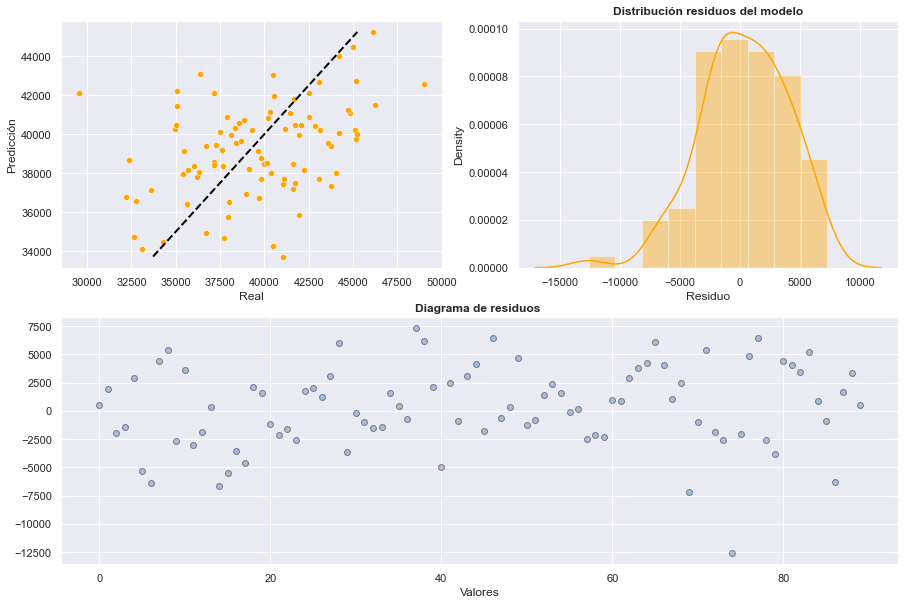

In [124]:
rf = RandomForestRegressor(max_features='auto', n_estimators= 400).fit(X_train,y_train)

y_pred=rf.predict(X)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

import matplotlib.gridspec as gridspec


gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
sns.scatterplot(y=y_test_pred,x=y_test,color='orange')
plt.plot([y_test_pred.min(), y_test_pred.max()], [y_test_pred.min(),y_test_pred.max()],
                    'k--', color = 'black', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.grid(True)

ax = plt.subplot(gs[0, 1]) # row 0, col 1
sns.distplot(y_test-y_test_pred,color= "orange")

plt.title('Distribución residuos del modelo',fontweight = "bold")
plt.xlabel("Residuo")

ax = plt.subplot(gs[1, :]) # row 1, span all columns
plt.scatter(list(range(len(y_test))), y_test - y_test_pred,
                       edgecolors=(0, 0, 0), alpha = 0.4)
plt.title("Diagrama de residuos ",fontweight = "bold")
plt.xlabel('Valores')


plt.show()

El diagrama de distribución del error no es normal, se sigue teniendo una mala performance del modelo al haber una alta dispersión de los datos observados con los predecidos. Si bien se ha producido una mejora, la misma no es lo suficiente para que el modelo logre explicar el comportamiento de la serie.

### PROPHET

Voy a utilizar esta librería para comparar con los modelos anteriores. Prophet no utiliza ARIMA y por lo tanto no requiere que la serie se encuentre diferenciada (estacionaria).

In [125]:
senial_2015_2019=pd.DataFrame(senial_estacionaria_2015_2019,columns=['cantidad_pasos'])
senial_2015_2019['index'] = senial_estacionaria_2015_2019.index
senial_2015_2019.columns = ['cantidad_pasos','fecha']
senial_2015_2019.head()

cantidad_pasos      fecha
fecha2                               
2015-01-02         12415.0 2015-01-02
2015-01-03        -10511.0 2015-01-03
2015-01-04          6202.0 2015-01-04
2015-01-05         14880.0 2015-01-05
2015-01-06         -2604.0 2015-01-06

Nuevamente, voy a predecir el último trimestre de 2019. Phophet no requiere transformar el dataset para modelo supervisado como hice anteriormente con RandomForest.

In [126]:
senial_prophet_train=senial_2015_2019.loc['2015-01-02':'2019-09-30']
senial_prophet_test=senial_2015_2019.loc['2019-10-01':'2019-12-31']

senial_prophet_train.reset_index(drop=True,inplace=True)

senial_prophet_test.reset_index(drop=True,inplace=True)

senial_prophet_train.head()

cantidad_pasos      fecha
0         12415.0 2015-01-02
1        -10511.0 2015-01-03
2          6202.0 2015-01-04
3         14880.0 2015-01-05
4         -2604.0 2015-01-06

In [127]:
senial_prophet_train.columns = ['y', 'ds']
senial_prophet_train

y         ds
0     12415.0 2015-01-02
1    -10511.0 2015-01-03
2      6202.0 2015-01-04
3     14880.0 2015-01-05
4     -2604.0 2015-01-06
...       ...        ...
1728   1624.0 2019-09-26
1729   1875.0 2019-09-27
1730  -3060.0 2019-09-28
1731  -3577.0 2019-09-29
1732  -1178.0 2019-09-30

[1733 rows x 2 columns]

In [128]:
from fbprophet import Prophet

model = Prophet(interval_width=0.95)

model.fit(senial_prophet_train)

future = model.make_future_dataframe(freq = "D", periods = 92,include_history=False)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


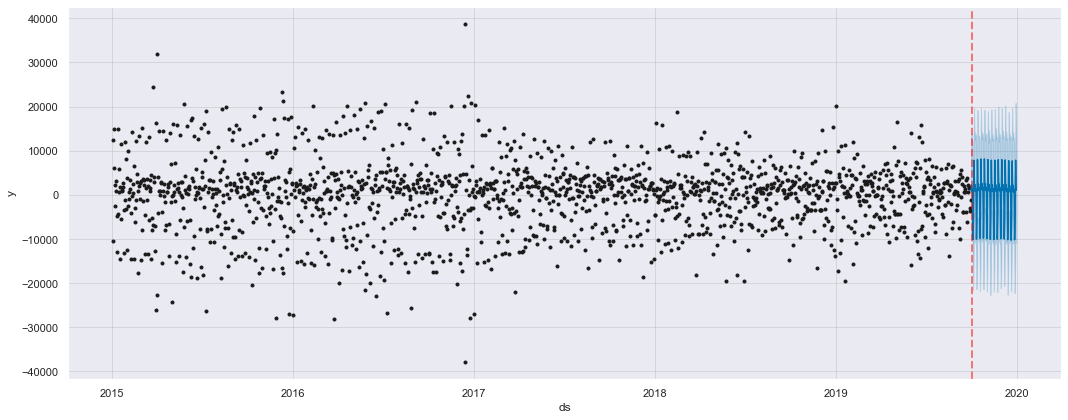

In [129]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = model.plot(forecast,figsize=(15,6))
plt.axvline(x=forecast['ds'].max() - datetime.timedelta(days=90), c='red', lw=2, alpha=0.5, ls='--')
plt.show()

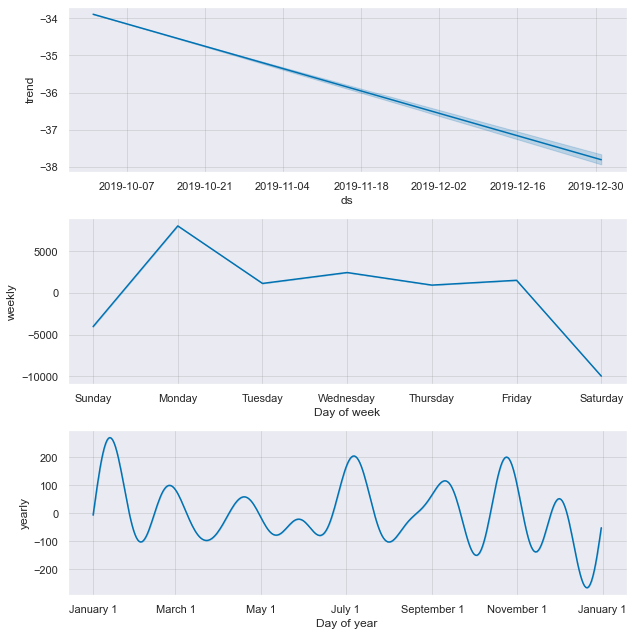

In [130]:
fig2 = model.plot_components(forecast)

In [131]:
val_real=pd.Series(senial_prophet_test.cantidad_pasos.values)
val_pred=pd.Series(forecast['yhat'])

predicciones=pd.concat([val_real.rename('Valores reales'),
                       val_pred.rename('Valores predichos'),
                       abs(val_real-val_pred).rename('Diferencia')],axis=1)

predicciones.sort_values(by=['Diferencia'], inplace=True)
predicciones

Valores reales  Valores predichos    Diferencia
79           554.0         632.881069     78.881069
68         -4237.0       -4093.635539    143.364461
22          2777.0        2589.113548    187.886452
59          1711.0        1507.661755    203.338245
89         -4422.0       -4208.720590    213.279410
..             ...                ...           ...
40          6455.0       -4172.279881  10627.279881
65        -10097.0         918.117672  11015.117672
4           1375.0      -10128.956548  11503.956548
67          4400.0       -9989.644593  14389.644593
41         -7879.0        7852.371677  15731.371677

[92 rows x 3 columns]

In [132]:
y_test=senial_prophet_test.cantidad_pasos
y_test_pred=forecast['yhat']

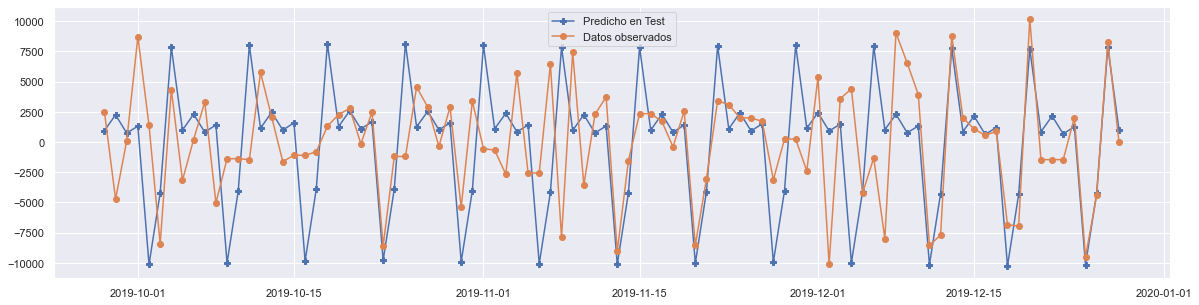

In [133]:
plt.figure(figsize=(20,5))
plt.plot(senial_2015_2019.index[N_train+look_back: length_total+2], y_test_pred,label = 'Predicho en Test',marker='P')
plt.plot(senial_2015_2019.index[N_train+look_back: length_total+2], y_test,'-o',label = 'Datos observados')
plt.legend()
plt.show()

In [134]:
MSE = mean_squared_error(y_test, y_test_pred)
print('RMSE en Test: ',np.sqrt(MSE))
print('R2 score en Test: ',r2_score(y_test,y_test_pred))

RMSE en Test:  5086.2431102510245
R2 score en Test:  -0.22862091183864752


C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


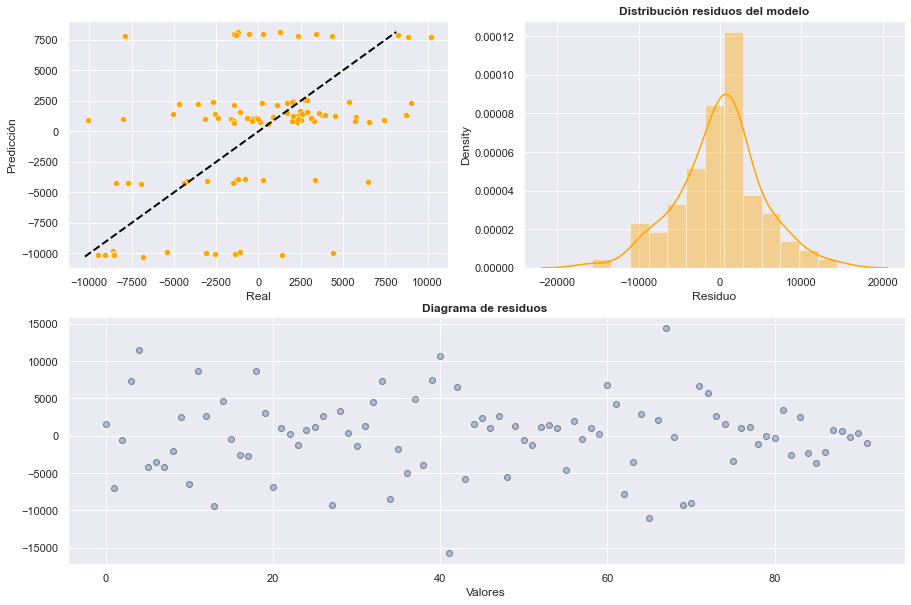

In [135]:
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
sns.scatterplot(y=y_test_pred,x=y_test,color='orange')
plt.plot([y_test_pred.min(), y_test_pred.max()], [y_test_pred.min(),y_test_pred.max()],
                    'k--', color = 'black', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.grid(True)

ax = plt.subplot(gs[0, 1]) # row 0, col 1
sns.distplot(y_test-y_test_pred,color= "orange")

plt.title('Distribución residuos del modelo',fontweight = "bold")
plt.xlabel("Residuo")

ax = plt.subplot(gs[1, :]) # row 1, span all columns
plt.scatter(list(range(len(y_test))), y_test - y_test_pred,
                       edgecolors=(0, 0, 0), alpha = 0.4)
plt.title("Diagrama de residuos ",fontweight = "bold")
plt.xlabel('Valores')


plt.show()

Los resultados obtenidos con Prophet no son mejores que los obtenidos con RandomForest.

# Para pensar, investigar y, opcionalmente, implementar

¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
¿Hay algo que te gustaría investigar o probar?

Para incorporar la información de tipo de vehículo, forma de pago, sentido, día de la semana, estaríamos frente a un caso de una serie de tiempo multivariada, por lo cual una de las técnicas posibles a implementar es Vector Auto Regression (VAR). 

En un modelo VAR, cada variable es una función lineal de sus valores anteriores y de los valores anteriores de las otras variables.

Sin embargo, también podemos utilizar Prophet por medio del metodo add_regressor(). Otra alternativa válida seríe one step prediction para transformar la serie de tiempo en un problema de análisis supervisado.

In [166]:
#Considero los años 2016-2019 porque 2015 no tiene la variable "sentido"
data_2016=pd.read_csv('flujo-vehicular-2016.csv',sep=',')
data_2019=pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018=pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017=pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2020=pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [167]:
data_2016_2019 = pd.concat([data_2019, data_2018, data_2017, data_2016])

mask = np.logical_and(data_2016_2019.estacion=='Illia', data_2016_2019.forma_pago == 'EFECTIVO')
dataset_2016_2019 = data_2016_2019[mask]
dataset_2016_2019.head()

periodo       fecha  hora_inicio  hora_fin     dia estacion    sentido  \
80      2019  2019-01-01            1         2  Martes    Illia     Centro   
86      2019  2019-01-01            1         2  Martes    Illia     Centro   
88      2019  2019-01-01            1         2  Martes    Illia  Provincia   
94      2019  2019-01-01            1         2  Martes    Illia  Provincia   
149     2019  2019-01-01            2         3  Martes    Illia     Centro   

    tipo_vehiculo forma_pago  cantidad_pasos  
80        Liviano   EFECTIVO             537  
86         Pesado   EFECTIVO               1  
88        Liviano   EFECTIVO             443  
94         Pesado   EFECTIVO               1  
149       Liviano   EFECTIVO             769

In [168]:
dataset_2016_2019['fecha2']=pd.to_datetime(dataset_2016_2019.fecha)#+ pd.to_timedelta(dataset_2016_2019.hora_fin.astype(int),unit='hours')
dataset_2016_2019.head()

<ipython-input-168-879efcda9b0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2016_2019['fecha2']=pd.to_datetime(dataset_2016_2019.fecha)#+ pd.to_timedelta(dataset_2016_2019.hora_fin.astype(int),unit='hours')


periodo       fecha  hora_inicio  hora_fin     dia estacion    sentido  \
80      2019  2019-01-01            1         2  Martes    Illia     Centro   
86      2019  2019-01-01            1         2  Martes    Illia     Centro   
88      2019  2019-01-01            1         2  Martes    Illia  Provincia   
94      2019  2019-01-01            1         2  Martes    Illia  Provincia   
149     2019  2019-01-01            2         3  Martes    Illia     Centro   

    tipo_vehiculo forma_pago  cantidad_pasos     fecha2  
80        Liviano   EFECTIVO             537 2019-01-01  
86         Pesado   EFECTIVO               1 2019-01-01  
88        Liviano   EFECTIVO             443 2019-01-01  
94         Pesado   EFECTIVO               1 2019-01-01  
149       Liviano   EFECTIVO             769 2019-01-01

In [169]:
dataset_2016_2019.drop(['periodo','fecha','hora_inicio','hora_fin','estacion','forma_pago'],axis=1,inplace=True)
dataset_2016_2019.head()

C:\Users\arrua\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


dia    sentido tipo_vehiculo  cantidad_pasos     fecha2
80   Martes     Centro       Liviano             537 2019-01-01
86   Martes     Centro        Pesado               1 2019-01-01
88   Martes  Provincia       Liviano             443 2019-01-01
94   Martes  Provincia        Pesado               1 2019-01-01
149  Martes     Centro       Liviano             769 2019-01-01

In [170]:
dataset_2016_2019.sort_values('fecha2', inplace = True)
dataset_2016_2019.reset_index(drop=True, inplace = True)

<ipython-input-170-e3e917edde83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2016_2019.sort_values('fecha2', inplace = True)


In [171]:
#dataset_2016_2019.index=dataset_2016_2019.fecha2
dataset_2016_2019.head()

dia    sentido tipo_vehiculo  cantidad_pasos     fecha2
0  Viernes  Provincia       Liviano              26 2016-01-01
1  Viernes  Provincia       Liviano             272 2016-01-01
2  Viernes  Provincia        Pesado               1 2016-01-01
3  Viernes  Provincia       Liviano               9 2016-01-01
4  Viernes  Provincia       Liviano             258 2016-01-01

In [172]:
dataset_2016_2019.tipo_vehiculo.unique()

array(['Liviano', 'Pesado'], dtype=object)

In [173]:
dataset_2016_2019.head()

dia    sentido tipo_vehiculo  cantidad_pasos     fecha2
0  Viernes  Provincia       Liviano              26 2016-01-01
1  Viernes  Provincia       Liviano             272 2016-01-01
2  Viernes  Provincia        Pesado               1 2016-01-01
3  Viernes  Provincia       Liviano               9 2016-01-01
4  Viernes  Provincia       Liviano             258 2016-01-01

Para las variables categóricas, lo que voy a hacer es armar distintos arrays  en los cuales iré calculando la moda por fecha. De todas las variables categóricas, no voy a considerar el día.

In [174]:
import scipy

tipo_vehiculo = dataset_2016_2019.groupby("fecha2")["tipo_vehiculo"].agg(lambda x: scipy.stats.mode(x)[0][0])
sentido= dataset_2016_2019.groupby("fecha2")["sentido"].agg(lambda x: scipy.stats.mode(x)[0][0])
#dia= dataset_2016_2019.groupby("fecha2")["dia"].agg(lambda x: scipy.stats.mode(x)[0][0])

In [175]:
dataset_2016_2019=dataset_2016_2019.resample('D',on='fecha2').sum()
dataset_2016_2019.head()

cantidad_pasos
fecha2                    
2016-01-01           25602
2016-01-02           36136
2016-01-03           37225
2016-01-04           50312
2016-01-05           49907

In [176]:
dataset_2016_2019['tipo_vehiculo']=tipo_vehiculo
dataset_2016_2019['sentido']=sentido
#dataset_2016_2019['dia']=dia
dataset_2016_2019.head()

cantidad_pasos tipo_vehiculo sentido
fecha2                                          
2016-01-01           25602        Pesado  Centro
2016-01-02           36136        Pesado  Centro
2016-01-03           37225        Pesado  Centro
2016-01-04           50312        Pesado  Centro
2016-01-05           49907        Pesado  Centro

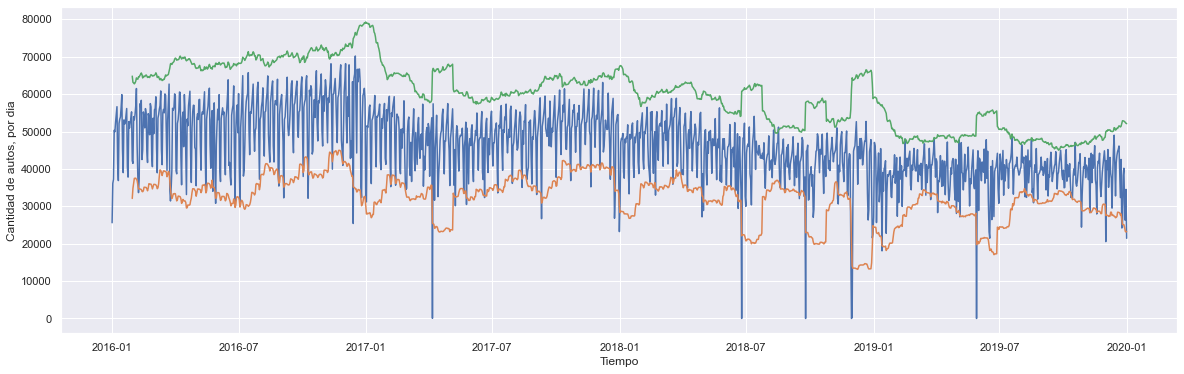

In [177]:
#Defino una ventana de 30 días

wind =30
sigma = 2

dataset_2016_2019["inferior"] = dataset_2016_2019.cantidad_pasos.rolling(window=wind)\
    .mean() - (sigma * dataset_2016_2019.cantidad_pasos.rolling(window=wind).std())
dataset_2016_2019["superior"] = dataset_2016_2019.cantidad_pasos.rolling(window=wind)\
    .mean() + (sigma * dataset_2016_2019.cantidad_pasos.rolling(window=wind).std())

dataset_2016_2019['anom']=dataset_2016_2019.apply(lambda x: x['cantidad_pasos'] if (x['cantidad_pasos'] <= x['inferior'] or x['cantidad_pasos']>=x['superior'] ) else 0,axis=1)

plt.figure(figsize = (20,6))
plt.plot(dataset_2016_2019.index, dataset_2016_2019.cantidad_pasos)
plt.plot(dataset_2016_2019.index, dataset_2016_2019.inferior)
plt.plot(dataset_2016_2019.index, dataset_2016_2019.superior)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

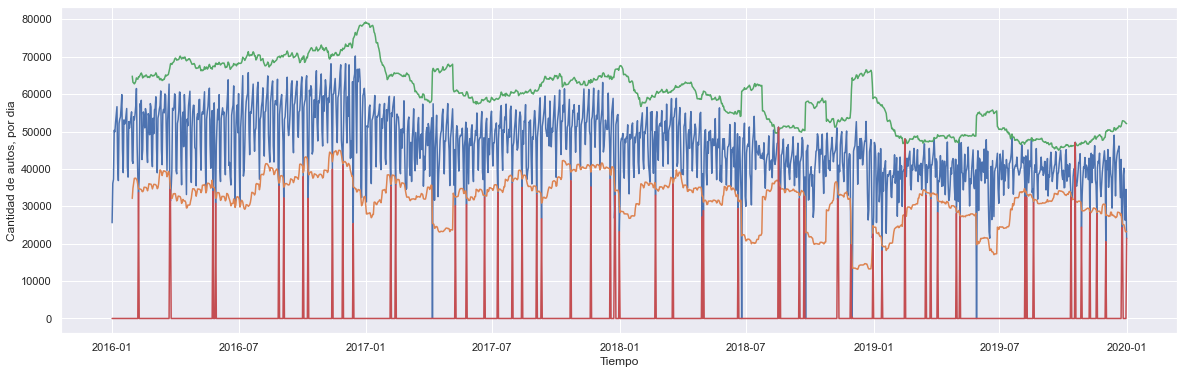

In [178]:
plt.figure(figsize = (20,6))
plt.plot(dataset_2016_2019.index, dataset_2016_2019.cantidad_pasos)
plt.plot(dataset_2016_2019.index, dataset_2016_2019.inferior)
plt.plot(dataset_2016_2019.index, dataset_2016_2019.superior)
plt.plot(dataset_2016_2019.index, dataset_2016_2019.anom)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [179]:
dataset_2016_2019.cantidad_pasos=dataset_2016_2019.apply(lambda x: x['cantidad_pasos'] if (x['anom']==0) else np.nan,axis=1)
dataset_2016_2019.cantidad_pasos=dataset_2016_2019.cantidad_pasos.replace(0,np.nan)
dataset_2016_2019.loc[dataset_2016_2019.anom!=0]

cantidad_pasos tipo_vehiculo    sentido      inferior  \
fecha2                                                              
2016-02-08             NaN        Pesado     Centro  34635.947653   
2016-03-24             NaN        Pesado     Centro  36906.949232   
2016-03-25             NaN        Pesado     Centro  34573.020120   
2016-05-25             NaN        Pesado     Centro  35063.819494   
2016-05-29             NaN        Pesado     Centro  32161.136691   
...                    ...           ...        ...           ...   
2019-11-18             NaN       Liviano     Centro  28343.912500   
2019-12-01             NaN       Liviano  Provincia  27530.375633   
2019-12-24             NaN       Liviano  Provincia  26616.516603   
2019-12-25             NaN       Liviano     Centro  25136.743869   
2019-12-31             NaN       Liviano  Provincia  23301.943426   

                superior   anom  
fecha2                           
2016-02-08  64624.119013  33661  
2016-03-24  66936.784102  34499  
2016-03-25  68090.246546  31431  
2016-05-25  67475.713840  34024  
2016-05-29  68258.863309  30796  
...                  ...    ...  
2019-11-18  48437.754167  27937  
2019-12-01  49940.291033  20553  
2019-12-24  52186.016730  24220  
2019-12-25  52886.522798  24349  
2019-12-31  52104.189908  21447  

[62 rows x 6 columns]

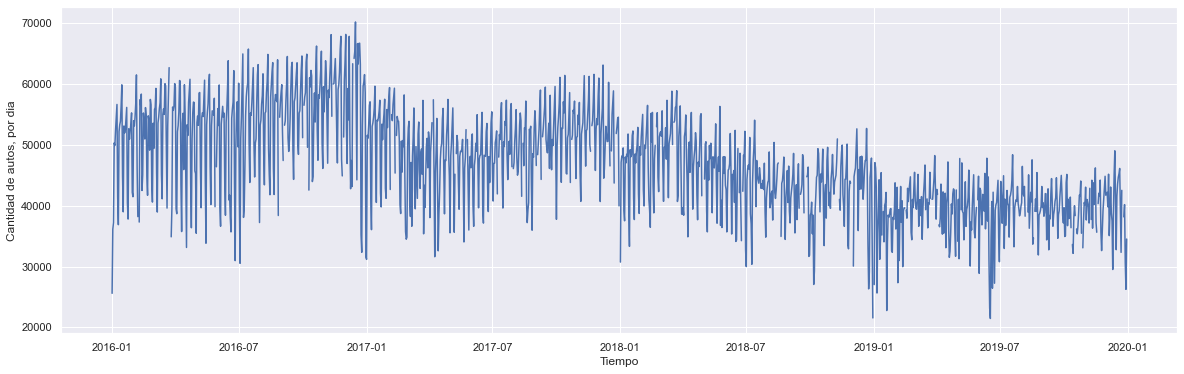

In [180]:
plt.figure(figsize = (20,6))
plt.plot(dataset_2016_2019.index, dataset_2016_2019.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [181]:
dataset_2016_2019.head()

cantidad_pasos tipo_vehiculo sentido  inferior  superior  anom
fecha2                                                                    
2016-01-01         25602.0        Pesado  Centro       NaN       NaN     0
2016-01-02         36136.0        Pesado  Centro       NaN       NaN     0
2016-01-03         37225.0        Pesado  Centro       NaN       NaN     0
2016-01-04         50312.0        Pesado  Centro       NaN       NaN     0
2016-01-05         49907.0        Pesado  Centro       NaN       NaN     0

In [182]:
dataset_2016_2019.drop(['inferior','superior','anom'],axis=1,inplace=True)

print("El dataset tiene los siguientes valores nulos:")
dataset_2016_2019.isnull().sum()

El dataset tiene los siguientes valores nulos:


cantidad_pasos    66
tipo_vehiculo      4
sentido            4
dtype: int64

In [183]:
dataset_2016_2019 =dataset_2016_2019.interpolate()

print("El dataset de diario tiene los siguientes valores nulos:")
dataset_2016_2019.isnull().sum()

El dataset de diario tiene los siguientes valores nulos:


cantidad_pasos    0
tipo_vehiculo     4
sentido           4
dtype: int64

Realmente son muy pocos valores nulos y todas las variables coinciden con la misma fecha. Voy a imputarlos a todos considerando la moda. Sin embargo, los días los puedo obtener.

In [184]:
dataset_2016_2019.loc[dataset_2016_2019.tipo_vehiculo.isnull()]

cantidad_pasos tipo_vehiculo sentido
fecha2                                          
2018-06-25         38312.5           NaN     NaN
2018-09-25         41299.5           NaN     NaN
2018-11-30         36899.5           NaN     NaN
2019-05-29         40353.5           NaN     NaN

In [185]:
dataset_2016_2019['fecha']=dataset_2016_2019.index

In [186]:
#dataset_2016_2019['weekday']=dataset_2016_2019.fecha.dt.day_name()

In [187]:
dataset_2016_2019.isnull().sum()

cantidad_pasos    0
tipo_vehiculo     4
sentido           4
fecha             0
dtype: int64

In [189]:
dataset_2016_2019.drop(['fecha'],axis=1,inplace=True)

In [190]:
dataset_imp=dataset_2016_2019[['tipo_vehiculo','sentido']]

In [191]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

columns=dataset_imp.columns

dataset_imp=imp.fit_transform(dataset_imp)

dataset_imp=pd.DataFrame(dataset_imp,columns=columns)


In [192]:
dataset_imp.isnull().sum()

tipo_vehiculo    0
sentido          0
dtype: int64

In [193]:
dataset_2016_2019.drop(['tipo_vehiculo','sentido'],axis=1,inplace=True)

In [194]:
dataset_2016_2019.reset_index(inplace=True)
dataset_2016_2019


fecha2  cantidad_pasos
0    2016-01-01         25602.0
1    2016-01-02         36136.0
2    2016-01-03         37225.0
3    2016-01-04         50312.0
4    2016-01-05         49907.0
...         ...             ...
1456 2019-12-27         40182.0
1457 2019-12-28         30681.0
1458 2019-12-29         26259.0
1459 2019-12-30         34523.0
1460 2019-12-31         34523.0

[1461 rows x 2 columns]

In [195]:
dataset_2016_2019=pd.concat([dataset_2016_2019,dataset_imp],axis=1,ignore_index=False)

In [196]:
dataset_2016_2019.index=dataset_2016_2019.fecha2
dataset_2016_2019.drop(['fecha2'],axis=1,inplace=True)
dataset_2016_2019

cantidad_pasos tipo_vehiculo    sentido
fecha2                                             
2016-01-01         25602.0        Pesado     Centro
2016-01-02         36136.0        Pesado     Centro
2016-01-03         37225.0        Pesado     Centro
2016-01-04         50312.0        Pesado     Centro
2016-01-05         49907.0        Pesado     Centro
...                    ...           ...        ...
2019-12-27         40182.0       Liviano     Centro
2019-12-28         30681.0       Liviano     Centro
2019-12-29         26259.0       Liviano     Centro
2019-12-30         34523.0       Liviano     Centro
2019-12-31         34523.0       Liviano  Provincia

[1461 rows x 3 columns]

In [197]:
#dataset_2016_2019.weekday.unique()

In [198]:
dataset_2016_2019.sentido.unique()

array(['Centro', 'Provincia'], dtype=object)

In [199]:
dataset_2016_2019.tipo_vehiculo.unique()

array(['Pesado', 'Liviano'], dtype=object)

Voy a pasar las variables categóricas a numéricas. Prefiero no usar one_hot encoding para no agregar tantas columnas innecesarias.

In [200]:
#dataset_2016_2019.weekday=np.where(dataset_2016_2019.weekday=='Monday',1,dataset_2016_2019.weekday)
#dataset_2016_2019.weekday=np.where(dataset_2016_2019.weekday=='Tuesday',2,dataset_2016_2019.weekday)
#dataset_2016_2019.weekday=np.where(dataset_2016_2019.weekday=='Wednesday',3,dataset_2016_2019.weekday)
#dataset_2016_2019.weekday=np.where(dataset_2016_2019.weekday=='Thursday',4,dataset_2016_2019.weekday)
#dataset_2016_2019.weekday=np.where(dataset_2016_2019.weekday=='Friday',5,dataset_2016_2019.weekday)
#dataset_2016_2019.weekday=np.where(dataset_2016_2019.weekday=='Saturday',6,dataset_2016_2019.weekday)
#dataset_2016_2019.weekday=np.where(dataset_2016_2019.weekday=='Sunday',7,dataset_2016_2019.weekday)

dataset_2016_2019.sentido=np.where(dataset_2016_2019.sentido=='Centro',0,dataset_2016_2019.sentido)
dataset_2016_2019.sentido=np.where(dataset_2016_2019.sentido=='Provincia',1,dataset_2016_2019.sentido)

dataset_2016_2019.tipo_vehiculo=np.where(dataset_2016_2019.tipo_vehiculo=='Liviano',0,dataset_2016_2019.tipo_vehiculo)
dataset_2016_2019.tipo_vehiculo=np.where(dataset_2016_2019.tipo_vehiculo=='Pesado',1,dataset_2016_2019.tipo_vehiculo)

In [201]:
#dataset_2016_2019.weekday.value_counts()

In [202]:
dataset_2016_2019.sentido.value_counts()

0    1349
1     112
Name: sentido, dtype: int64

In [203]:
dataset_2016_2019.tipo_vehiculo.value_counts()

1    1095
0     366
Name: tipo_vehiculo, dtype: int64

In [204]:
dataset_2016_2019

cantidad_pasos tipo_vehiculo sentido
fecha2                                          
2016-01-01         25602.0             1       0
2016-01-02         36136.0             1       0
2016-01-03         37225.0             1       0
2016-01-04         50312.0             1       0
2016-01-05         49907.0             1       0
...                    ...           ...     ...
2019-12-27         40182.0             0       0
2019-12-28         30681.0             0       0
2019-12-29         26259.0             0       0
2019-12-30         34523.0             0       0
2019-12-31         34523.0             0       1

[1461 rows x 3 columns]

In [205]:
dataset_2016_2019['fecha2']=dataset_2016_2019.index
senial_prophet_train=dataset_2016_2019.loc['2016-01-01':'2019-09-30']
senial_prophet_test=dataset_2016_2019.loc['2019-10-01':'2019-12-31']

senial_prophet_train.reset_index(drop=True,inplace=True)

senial_prophet_test.reset_index(drop=True,inplace=True)

senial_prophet_train.head()

cantidad_pasos tipo_vehiculo sentido     fecha2
0         25602.0             1       0 2016-01-01
1         36136.0             1       0 2016-01-02
2         37225.0             1       0 2016-01-03
3         50312.0             1       0 2016-01-04
4         49907.0             1       0 2016-01-05

In [206]:
senial_prophet=dataset_2016_2019.rename(columns = {'cantidad_pasos': 'y', 'fecha2': 'ds'},inplace=False)
senial_prophet.reset_index(inplace=True,drop=True)

senial_prophet.head()

y tipo_vehiculo sentido         ds
0  25602.0             1       0 2016-01-01
1  36136.0             1       0 2016-01-02
2  37225.0             1       0 2016-01-03
3  50312.0             1       0 2016-01-04
4  49907.0             1       0 2016-01-05

In [207]:
senial_train=senial_prophet_train[['cantidad_pasos','fecha2']]

senial_train.columns = ['y', 'ds']
senial_train

y         ds
0     25602.0 2016-01-01
1     36136.0 2016-01-02
2     37225.0 2016-01-03
3     50312.0 2016-01-04
4     49907.0 2016-01-05
...       ...        ...
1364  43110.0 2019-09-26
1365  44985.0 2019-09-27
1366  41925.0 2019-09-28
1367  38348.0 2019-09-29
1368  37170.0 2019-09-30

[1369 rows x 2 columns]

In [208]:
senial_train['tipo_vehiculo']=senial_prophet_train.tipo_vehiculo
#senial_test.tipo_vehiculo=senial_prophet_test.tipo_vehiculo

senial_train['sentido']=senial_prophet_train.sentido
#senial_test.sentido=senial_prophet_test.sentido

#senial_train['weekday']=senial_prophet_train.weekday
#senial_test.dia=senial_prophet_test.dia

senial_train

<ipython-input-208-f92ac2cb5d61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senial_train['tipo_vehiculo']=senial_prophet_train.tipo_vehiculo


y         ds tipo_vehiculo sentido
0     25602.0 2016-01-01             1       0
1     36136.0 2016-01-02             1       0
2     37225.0 2016-01-03             1       0
3     50312.0 2016-01-04             1       0
4     49907.0 2016-01-05             1       0
...       ...        ...           ...     ...
1364  43110.0 2019-09-26             0       0
1365  44985.0 2019-09-27             0       0
1366  41925.0 2019-09-28             0       0
1367  38348.0 2019-09-29             0       0
1368  37170.0 2019-09-30             0       0

[1369 rows x 4 columns]

Para incluir las variables en cuestión, voy a utilizar el método "add_regressor" de Prophet.

In [209]:
from fbprophet import Prophet

model = Prophet(interval_width=0.95)
model.add_regressor('tipo_vehiculo')
#model.add_regressor('weekday')
model.add_regressor('sentido')

model.fit(senial_train)

future = model.make_future_dataframe(freq = "D", periods =92,include_history=False)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [213]:
future['tipo_vehiculo']=senial_prophet_test.tipo_vehiculo
#future['weekday']=senial_prophet_test.weekday
future['sentido']=senial_prophet_test.sentido

In [214]:
forecast['ds'].max()

Timestamp('2019-12-31 00:00:00')

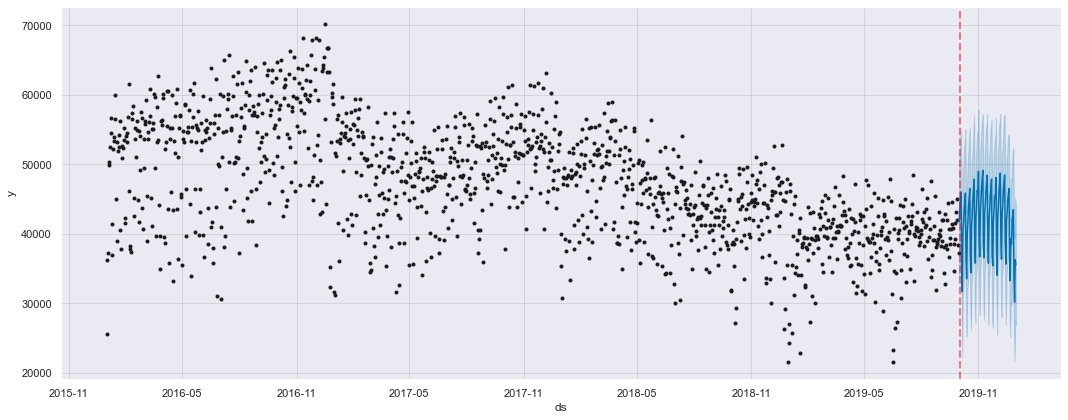

In [215]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = model.plot(forecast,figsize=(15,6))
plt.axvline(x=forecast['ds'].max() - datetime.timedelta(days=90), c='red', lw=2, alpha=0.5, ls='--')
plt.show()

Como se puede observar en el gráfico anterior, el modelo claramente me esta prediciendo el último trimestre de 2019. Las anteriores son observaciones de la variable cantidad_pasos.

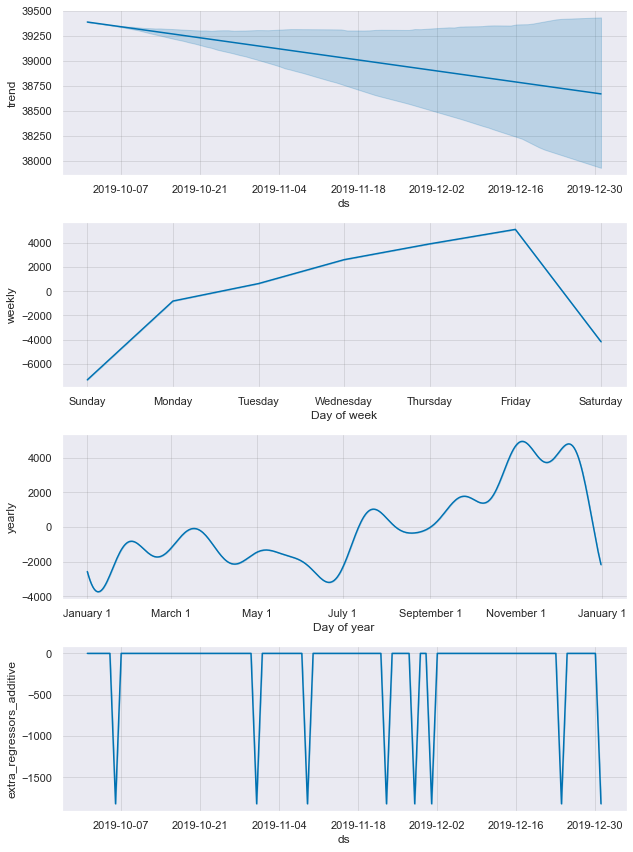

In [216]:
fig2 = model.plot_components(forecast)

Voy a generar un dataset que me informe de manera ordenada la diferencia entre los valores reales y predichos.

In [217]:
val_real=pd.Series(senial_prophet_test.cantidad_pasos.values)
val_pred=pd.Series(forecast.yhat)

predicciones=pd.concat([val_real.rename('Valores reales'),
                       val_pred.rename('Valores predichos'),
                       abs(val_real-val_pred).rename('Diferencia')],axis=1)

predicciones.index=forecast.index

predicciones.sort_values(by='Diferencia',ascending=True)[:5]

Valores reales  Valores predichos  Diferencia
78         44687.0       44694.687339    7.687339
47         35640.0       35738.235292   98.235292
12         33626.0       33484.613737  141.386263
39         37738.0       37923.995770  185.995770
62         42215.0       42436.865574  221.865574

In [218]:
y_test=senial_prophet_test.cantidad_pasos
y_test_pred=forecast['yhat']

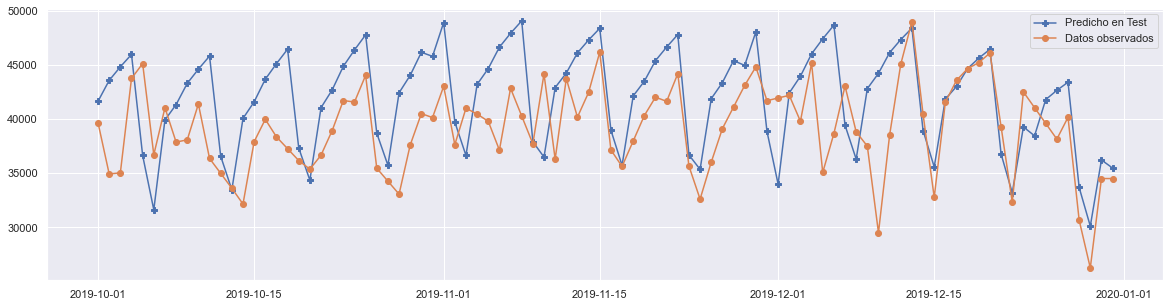

In [219]:
plt.figure(figsize=(20,5))
plt.plot(senial_2015_2019.loc['2019-10-01':'2019-12-31'].index, y_test_pred,label = 'Predicho en Test',marker='P')
plt.plot(senial_2015_2019.loc['2019-10-01':'2019-12-31'].index, y_test,'-o',label = 'Datos observados')
plt.legend()
plt.show()

In [220]:
MSE = mean_squared_error(y_test, y_test_pred)
print('RMSE en Test: ',np.sqrt(MSE))
print('R2 score en Test: ',r2_score(y_test,y_test_pred))

RMSE en Test:  5025.509589917572
R2 score en Test:  -0.4961867538334084


C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


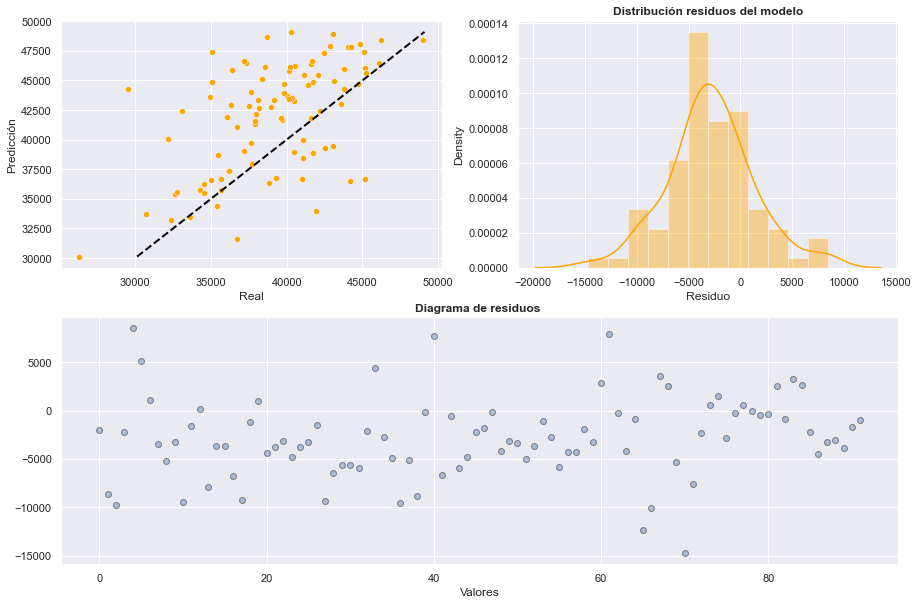

In [221]:
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
sns.scatterplot(y=y_test_pred,x=y_test,color='orange')
plt.plot([y_test_pred.min(), y_test_pred.max()], [y_test_pred.min(),y_test_pred.max()],
                    'k--', color = 'black', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.grid(True)

ax = plt.subplot(gs[0, 1]) # row 0, col 1
sns.distplot(y_test-y_test_pred,color= "orange")

plt.title('Distribución residuos del modelo',fontweight = "bold")
plt.xlabel("Residuo")

ax = plt.subplot(gs[1, :]) # row 1, span all columns
plt.scatter(list(range(len(y_test))), y_test - y_test_pred,
                       edgecolors=(0, 0, 0), alpha = 0.4)
plt.title("Diagrama de residuos ",fontweight = "bold")
plt.xlabel('Valores')


plt.show()

EL hecho de tener un coeficiente de determinación aún mas negativo nos informa que el modelo no ha mejorado al agregar las variables. Algo que se podría hacer para mejorar es agregar los días feriados al algoritmo.

### Multivariable forecasting con análisis supervisado

De nuevo voy a predecir el comportamiento de la serie en el último trimestre del 2019, para comparar resultados.

In [222]:
dataset_2016_2019.head()

cantidad_pasos tipo_vehiculo sentido     fecha2
fecha2                                                     
2016-01-01         25602.0             1       0 2016-01-01
2016-01-02         36136.0             1       0 2016-01-02
2016-01-03         37225.0             1       0 2016-01-03
2016-01-04         50312.0             1       0 2016-01-04
2016-01-05         49907.0             1       0 2016-01-05

In [223]:
dataset_2016_2019.drop(['fecha2'],inplace=True,axis=1)

In [224]:
dataset_2016_2019.head()

cantidad_pasos tipo_vehiculo sentido
fecha2                                          
2016-01-01         25602.0             1       0
2016-01-02         36136.0             1       0
2016-01-03         37225.0             1       0
2016-01-04         50312.0             1       0
2016-01-05         49907.0             1       0

In [225]:
dataset_2016_2019.shape

(1461, 3)

En este caso no es tan secillo porque no tengo una sola variable, sino 4. Esto quiere decir que si tengo que considerar como y el valor de cantidad_pasos en t, debería poder considerar las 4 variables para cada uno de los 28 días anteriores, lo cual me da 4*28 columnas..

In [226]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # Entrada (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast 
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
 
ds=dataset_2016_2019
values = ds.values
data = series_to_supervised(values, 28, 1)
print(pd.DataFrame(data))

     var1(t-28) var2(t-28) var3(t-28) var1(t-27) var2(t-27) var3(t-27)  \
28        25602          1          0      36136          1          0   
29        36136          1          0      37225          1          0   
30        37225          1          0      50312          1          0   
31        50312          1          0      49907          1          0   
32        49907          1          0      52492          1          0   
...         ...        ...        ...        ...        ...        ...   
1456      44841          0          0      41722          0          0   
1457      41722          0          0    41968.5          0          1   
1458    41968.5          0          1      42215          0          0   
1459      42215          0          0      39820          0          0   
1460      39820          0          0      45181          0          0   

     var1(t-26) var2(t-26) var3(t-26) var1(t-25)  ... var3(t-3) var1(t-2)  \
28        37225          1        

In [227]:
data=pd.DataFrame(data)
data.head()

var1(t-28) var2(t-28) var3(t-28) var1(t-27) var2(t-27) var3(t-27)  \
28      25602          1          0      36136          1          0   
29      36136          1          0      37225          1          0   
30      37225          1          0      50312          1          0   
31      50312          1          0      49907          1          0   
32      49907          1          0      52492          1          0   

   var1(t-26) var2(t-26) var3(t-26) var1(t-25)  ... var3(t-3) var1(t-2)  \
28      37225          1          0      50312  ...         0     52301   
29      50312          1          0      49907  ...         0     53411   
30      49907          1          0      52492  ...         0     55258   
31      52492          1          0      54514  ...         0     42187   
32      54514          1          0      56645  ...         0     41477   

   var2(t-2) var3(t-2) var1(t-1) var2(t-1) var3(t-1) var1(t) var2(t) var3(t)  
28         1         0     53411         1         0   55258       1       0  
29         1         0     55258         1         0   42187       1       0  
30         1         0     42187         1         0   41477       1       0  
31         1         0     41477         1         0   53972       1       0  
32         1         0     53972         1         0   53116       1       0  

[5 rows x 87 columns]

In [228]:
X=data.drop(['var1(t)','var2(t)','var3(t)'],axis=1)
y=data[['var1(t)']]

X_columns=X.columns

X=X.values
y=y.values

In [229]:
look_back=7*4

N_train = 365*3+270- look_back # 3 años + 3 trimestres
N_test = 90 # 1 trimestre
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1337, 84) (1337, 1)
(90, 84) (90, 1)


In [230]:
from sklearn.metrics import r2_score, mean_squared_error

for name, (model, params) in modelos_parametros.items(): 
    
    grid = GridSearchCV(estimator=model, cv=tscv,scoring='neg_mean_squared_error',
                            param_grid=params)
    grid.fit(X_train, y_train.ravel())
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)
    
    print(grid.best_params_)
    
    MSE = mean_squared_error(y_train, y_train_pred)
    print('RMSE en Train: {}',name,np.sqrt(MSE))
    print('R2 score en Train: {}',name,r2_score(y_train,y_train_pred))
    
    MSE = mean_squared_error(y_test, y_test_pred)
    print('RMSE en Test: {}',name,np.sqrt(MSE))
    print('R2 score en Test: {}',name,r2_score(y_test,y_test_pred))

{'max_features': 'auto', 'n_estimators': 200}
RMSE en Train: {} RandomForestRegressor 1622.0376148335706
R2 score en Train: {} RandomForestRegressor 0.9609234876187188
RMSE en Test: {} RandomForestRegressor 3286.506446923239
R2 score en Test: {} RandomForestRegressor 0.25168366819958665
{'gamma': 0.5, 'max_depth': 4}
RMSE en Train: {} XgBoost 1040.2214901967889
R2 score en Train: {} XgBoost 0.9839289002541493
RMSE en Test: {} XgBoost 3690.7387725651547
R2 score en Test: {} XgBoost 0.056280647278637796


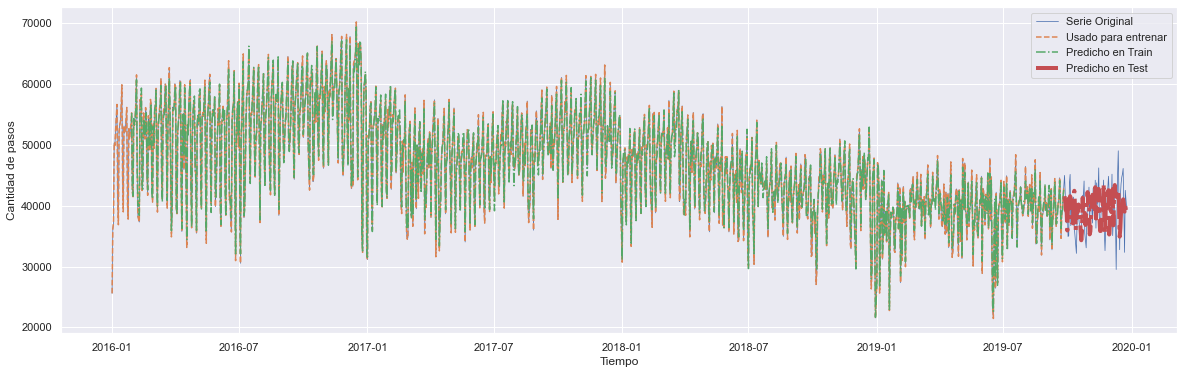

In [231]:
plt.figure(figsize=(20,6))
plt.plot(dataset_2016_2019.index[:length_total], dataset_2016_2019[:length_total].cantidad_pasos,lw = 0.75, label = 'Serie Original')
plt.plot(dataset_2016_2019.index[:N_train + look_back], dataset_2016_2019[:N_train + look_back].cantidad_pasos,'--', label = 'Usado para entrenar')
plt.plot(dataset_2016_2019.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(dataset_2016_2019.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

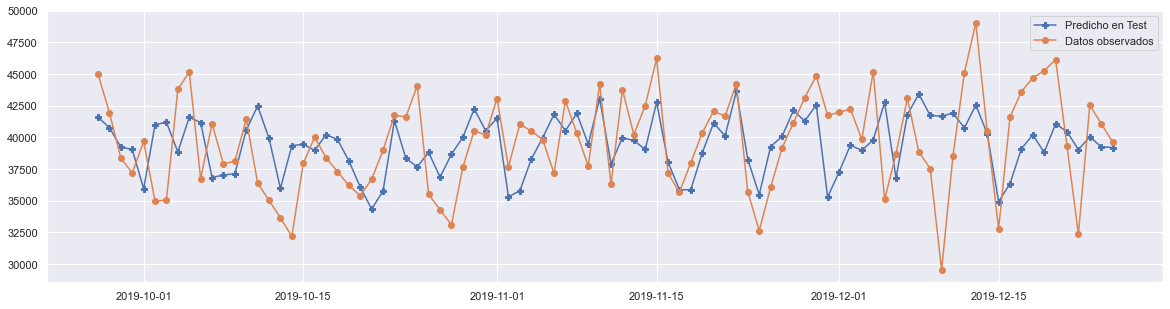

In [232]:
plt.figure(figsize=(20,5))
plt.plot(dataset_2016_2019.index[N_train+look_back: length_total], y_test_pred,label = 'Predicho en Test',marker='P')
plt.plot(dataset_2016_2019.index[N_train+look_back: length_total], y_test,'-o',label = 'Datos observados')
plt.legend()
plt.show()

<ipython-input-233-75c9fb2a4625>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(max_features='auto', n_estimators= 200).fit(X_train,y_train)


RMSE en Train : 1619.5634037461152
R2 score en Train: 0.9610426091484751
RMSE en Test : 3328.2091570632547
R2 score en Test : 0.2325723033870538


C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


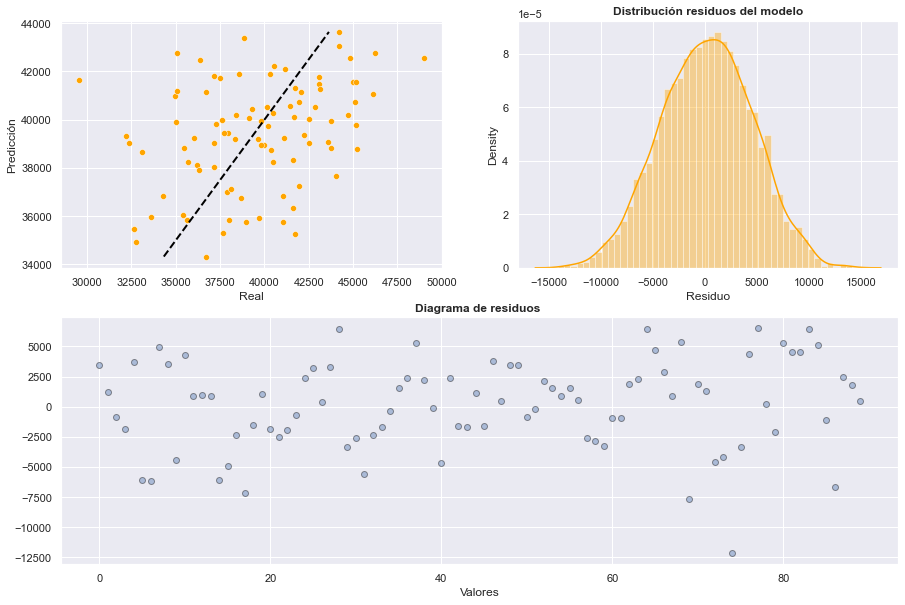

In [233]:
rf = RandomForestRegressor(max_features='auto', n_estimators= 200).fit(X_train,y_train)

y_pred=rf.predict(X)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

MSE = mean_squared_error(y_train, y_pred_train)
print('RMSE en Train :',np.sqrt(MSE))
print('R2 score en Train:',r2_score(y_train,y_pred_train))

MSE = mean_squared_error(y_test, y_pred_test)
print('RMSE en Test :',np.sqrt(MSE))
print('R2 score en Test :',r2_score(y_test,y_pred_test))

import matplotlib.gridspec as gridspec


gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
sns.scatterplot(y=y_test_pred,x=y_test.ravel(),color='orange')
plt.plot([y_test_pred.min(), y_test_pred.max()], [y_test_pred.min(),y_test_pred.max()],
                    'k--', color = 'black', lw=2)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.grid(True)

ax = plt.subplot(gs[0, 1]) # row 0, col 1
sns.distplot(y_test-y_test_pred,color= "orange")

plt.title('Distribución residuos del modelo',fontweight = "bold")
plt.xlabel("Residuo")

ax = plt.subplot(gs[1, :]) # row 1, span all columns
plt.scatter(list(range(len(y_test.ravel()))), y_test.ravel() - y_test_pred,
                       edgecolors=(0, 0, 0), alpha = 0.4)
plt.title("Diagrama de residuos ",fontweight = "bold")
plt.xlabel('Valores')


plt.show()

Se puede observar que sin duda los resultados han mejorado luego de agregar las variables. Esto se puede observar tanto en las métricas (RMSE es mas bajo y el coeficiente de determinación más alto) como el el gráfico de distribución de errores, el cual tiene comportamiento mas normal. Si bien la mejora no fue significativa como se esperaba, es un avance.

¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras? 

In [234]:
data_2016=pd.read_csv('flujo-vehicular-2016.csv',sep=',')
data_2019=pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018=pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017=pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2020=pd.read_csv('flujo-vehicular-2020.csv', sep =',')

data_2016_2019 = pd.concat([data_2019, data_2018, data_2017, data_2016])

mask = data_2016_2019.forma_pago == 'EFECTIVO'
dataset_2016_2019 = data_2016_2019[mask]
dataset_2016_2019.head()

periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
4      2019  2019-01-01            0         1  Martes  Avellaneda     Centro   
9      2019  2019-01-01            0         1  Martes  Avellaneda  Provincia   
35     2019  2019-01-01            1         2  Martes     Alberti  Provincia   
40     2019  2019-01-01            1         2  Martes     Alberti  Provincia   
42     2019  2019-01-01            1         2  Martes  Avellaneda     Centro   

   tipo_vehiculo forma_pago  cantidad_pasos  
4        Liviano   EFECTIVO              16  
9        Liviano   EFECTIVO              12  
35       Liviano   EFECTIVO             182  
40        Pesado   EFECTIVO               1  
42       Liviano   EFECTIVO            1327

In [235]:
dataset_2016_2019['fecha2']=pd.to_datetime(dataset_2016_2019.fecha)#+ pd.to_timedelta(dataset_2016_2019.hora_fin.astype(int),unit='hours')
dataset_2016_2019.head()

<ipython-input-235-879efcda9b0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2016_2019['fecha2']=pd.to_datetime(dataset_2016_2019.fecha)#+ pd.to_timedelta(dataset_2016_2019.hora_fin.astype(int),unit='hours')


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
4      2019  2019-01-01            0         1  Martes  Avellaneda     Centro   
9      2019  2019-01-01            0         1  Martes  Avellaneda  Provincia   
35     2019  2019-01-01            1         2  Martes     Alberti  Provincia   
40     2019  2019-01-01            1         2  Martes     Alberti  Provincia   
42     2019  2019-01-01            1         2  Martes  Avellaneda     Centro   

   tipo_vehiculo forma_pago  cantidad_pasos     fecha2  
4        Liviano   EFECTIVO              16 2019-01-01  
9        Liviano   EFECTIVO              12 2019-01-01  
35       Liviano   EFECTIVO             182 2019-01-01  
40        Pesado   EFECTIVO               1 2019-01-01  
42       Liviano   EFECTIVO            1327 2019-01-01

In [236]:
dataset_2016_2019.estacion.unique()

array(['Avellaneda', 'Alberti', 'Dellepiane', 'Illia', 'Retiro',
       'Alberdi', 'Dellepiane Centro', 'Dellepiane Liniers'], dtype=object)

In [237]:
dataset_2016_2019_illia=dataset_2016_2019.loc[dataset_2016_2019.estacion=='Illia']
dataset_2016_2019_liniers=dataset_2016_2019.loc[dataset_2016_2019.estacion=='Dellepiane Liniers']
dataset_2016_2019_centro=dataset_2016_2019.loc[dataset_2016_2019.estacion=='Dellepiane Centro']
dataset_2016_2019_retiro=dataset_2016_2019.loc[dataset_2016_2019.estacion=='Retiro']
dataset_2016_2019_avellaneda=dataset_2016_2019.loc[dataset_2016_2019.estacion=='Avellaneda']
dataset_2016_2019_dellepiane=dataset_2016_2019.loc[dataset_2016_2019.estacion=='Dellepiane']
dataset_2016_2019_alberti=dataset_2016_2019.loc[dataset_2016_2019.estacion=='Alberti']

In [238]:
dataset_2016_2019_illia=dataset_2016_2019_illia.resample('D',on='fecha2').sum()
dataset_2016_2019_liniers=dataset_2016_2019_liniers.resample('D',on='fecha2').sum()
dataset_2016_2019_centro=dataset_2016_2019_centro.resample('D',on='fecha2').sum()
dataset_2016_2019_retiro=dataset_2016_2019_retiro.resample('D',on='fecha2').sum()
dataset_2016_2019_avellaneda=dataset_2016_2019_avellaneda.resample('D',on='fecha2').sum()
dataset_2016_2019_dellepiane=dataset_2016_2019_dellepiane.resample('D',on='fecha2').sum()
dataset_2016_2019_alberti=dataset_2016_2019_alberti.resample('D',on='fecha2').sum()

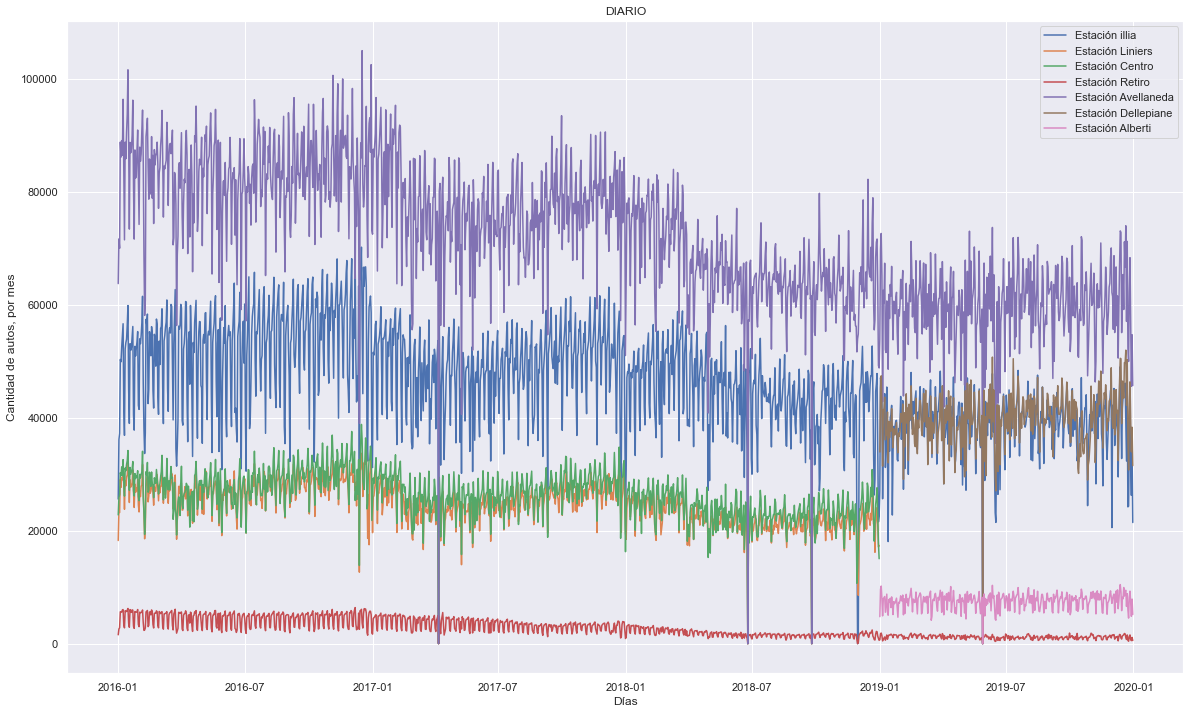

In [239]:
plt.figure(figsize = (20,12))
plt.plot(dataset_2016_2019_illia.index, dataset_2016_2019_illia.cantidad_pasos,label='Estación illia')
plt.plot(dataset_2016_2019_liniers.index, dataset_2016_2019_liniers.cantidad_pasos,label='Estación Liniers')
plt.plot(dataset_2016_2019_centro.index, dataset_2016_2019_centro.cantidad_pasos,label='Estación Centro')
plt.plot(dataset_2016_2019_retiro.index, dataset_2016_2019_retiro.cantidad_pasos,label='Estación Retiro')
plt.plot(dataset_2016_2019_avellaneda.index, dataset_2016_2019_avellaneda.cantidad_pasos,label='Estación Avellaneda')
plt.plot(dataset_2016_2019_dellepiane.index, dataset_2016_2019_dellepiane.cantidad_pasos,label='Estación Dellepiane')
plt.plot(dataset_2016_2019_alberti.index, dataset_2016_2019_alberti.cantidad_pasos,label='Estación Alberti')
plt.xlabel('Días')
plt.ylabel('Cantidad de autos, por mes')
plt.title('DIARIO')
plt.legend()
plt.show()

Se puede observar que la estación Illia y Avellaneda tienen mas o menos el mismo comportamiento y tendencia, aunque es evidente que la estación Avellaneda tiene mayor flujo vehicular. Se podría haber utilizado esta serie ya qye contiene mas datos que la estación de Illia.

Adicionalmente, las estaciones Centro y Liniers tienen casi el mismo comportamiento y el mismo flujo de vehículos, pero no se podrían haber utilizado para responder a la consigna debido a que no hay datos para todo el año 2019.

En cuanto a la estación de retiro, es la que menor datos presenta de todas las estaciones.

Con respecto a Alberti y Dellepiane, se empezaron a registrar datos desde el año 2019, por lo cual no hubieran servido para hacer las predicciones.

3. ¿Hay algo que te gustaría investigar o probar?

Como punto de mejora para el proyecto 04, me gustaría aplicar modelos autorregresivos y redes neuronales recurrentes de tipo Long Short Term Memory (LSTM) para ver si los resultados son mejores que los obtenidos. También me gustaría agregar los días feriados de argentina al modelo generado con Prophet.